In [ ]:
import kagglehub
path = kagglehub.dataset_download("Microsoft/microsoft-security-incident-prediction")

print('Data source import complete.')

100%|██████████| 513M/513M [00:07<00:00, 74.9MB/s]

Extracting files...


Data source import complete.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Microsoft Incident Prediction").getOrCreate()

#Loading train and test data using pySpark

In [ ]:
df_train = spark.read.csv(path+"/GUIDE_Train.csv", header=True, inferSchema=True)

NameError: name 'spark' is not defined

In [ ]:
df_test = spark.read.csv(path+"/GUIDE_Test.csv", header=True, inferSchema=True)

NameError: name 'spark' is not defined

In [ ]:
df_train = df_train.toPandas()

df_test = df_test.toPandas()

#Sampling both train and test data - dont run


In [ ]:
# prompt: Sample all labels from IncidentGrade Equally and create a 0.15 fraction of train and test data to pandas dataframe

import pandas as pd
from pyspark.sql.functions import col
from pyspark.sql.functions import lit

# Assuming df_train and df_test are already defined as Spark DataFrames

# Sample labels from IncidentGrade equally
df_train = df_train.dropna(subset=["IncidentGrade"])
df_test = df_test.dropna(subset=["IncidentGrade"])

fractions = df_train.select("IncidentGrade").distinct().withColumn("fraction", lit(0.1)).rdd.collectAsMap()
sampled_train_df = df_train.sampleBy("IncidentGrade", fractions, seed=42)

fractions_test = df_test.select("IncidentGrade").distinct().withColumn("fraction", lit(0.1)).rdd.collectAsMap()
sampled_test_df = df_test.sampleBy("IncidentGrade", fractions_test, seed=42)


# Convert Spark DataFrames to Pandas DataFrames
sampled_train_df.toPandas().to_csv('sampleTrain.csv')
sampled_test_df.toPandas().to_csv('sampleTest.csv')



# Loading sampled Data from csv file created- dont run

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('sampleTrain.csv')
test_df = pd.read_csv('sampleTest.csv')

In [ ]:
train_df.columns


Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City'],
      dtype='object')

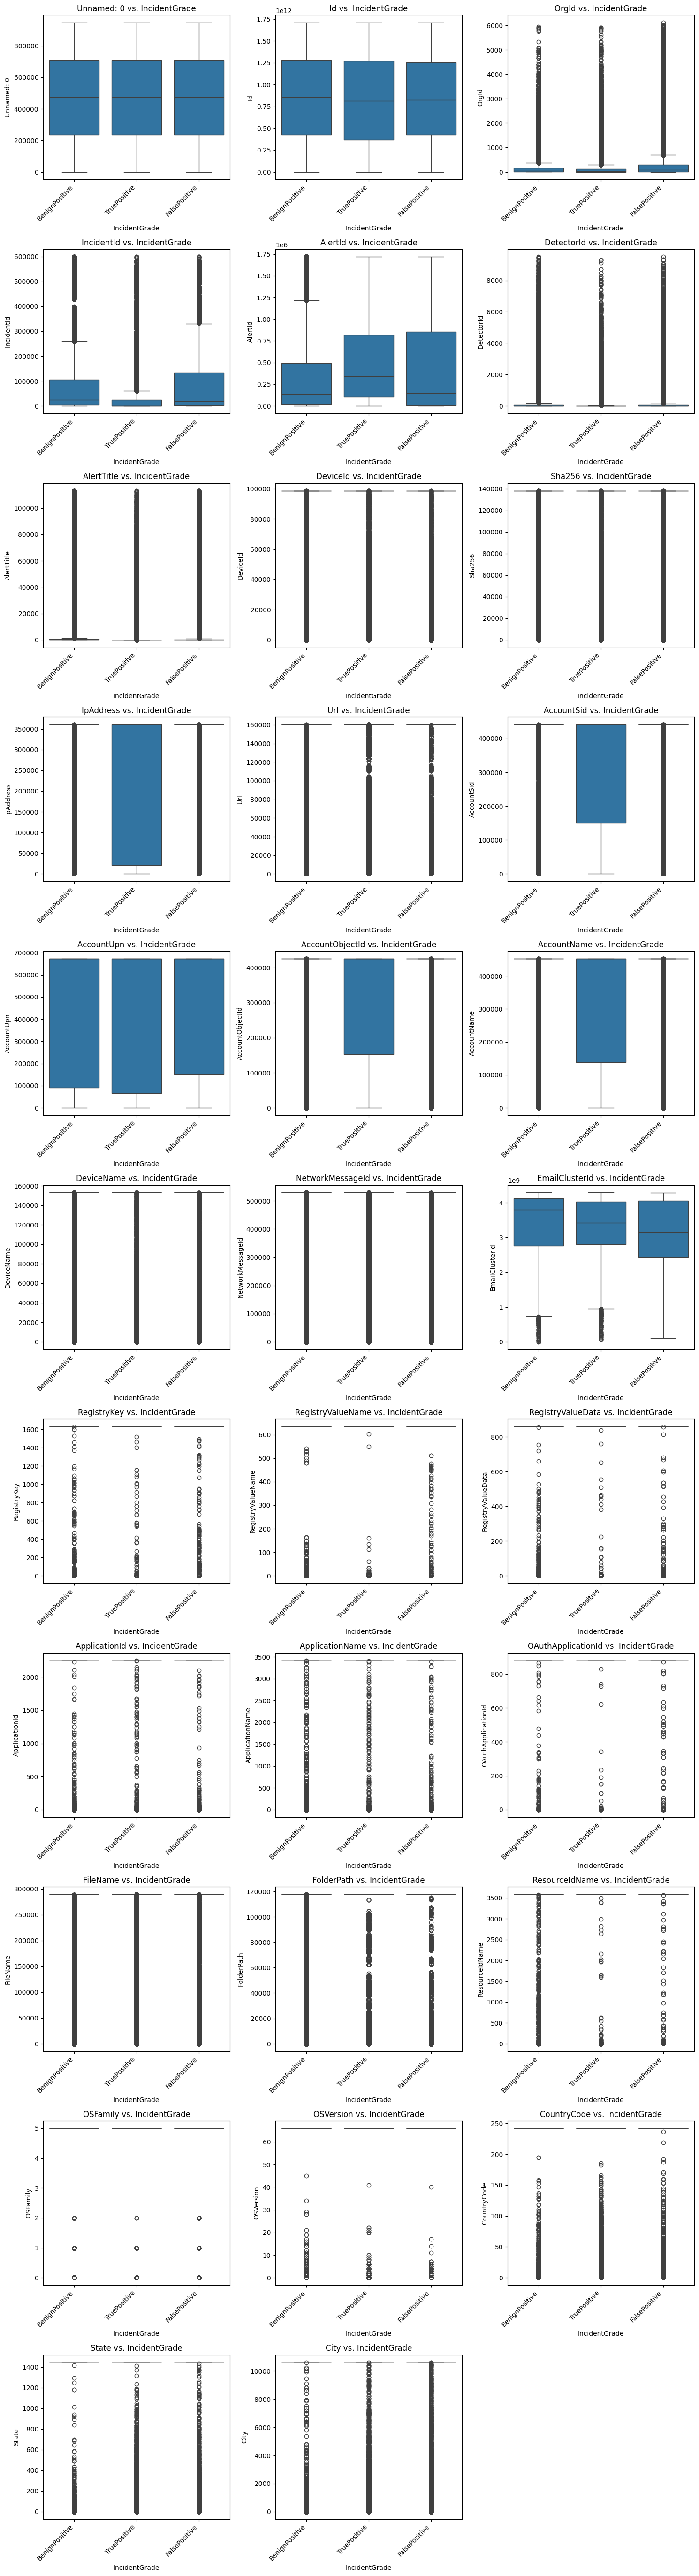

In [ ]:
# prompt: plot graph in train_df to understand various columns and how they change with Incident Grade column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is already loaded as a pandas DataFrame

# Select numerical columns for plotting (excluding IncidentGrade itself)
numerical_cols = train_df.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col != 'IncidentGrade']

# Create subplots for each numerical column
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='IncidentGrade', y=col, data=train_df)
    plt.title(f'{col} vs. IncidentGrade')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()

plt.show()

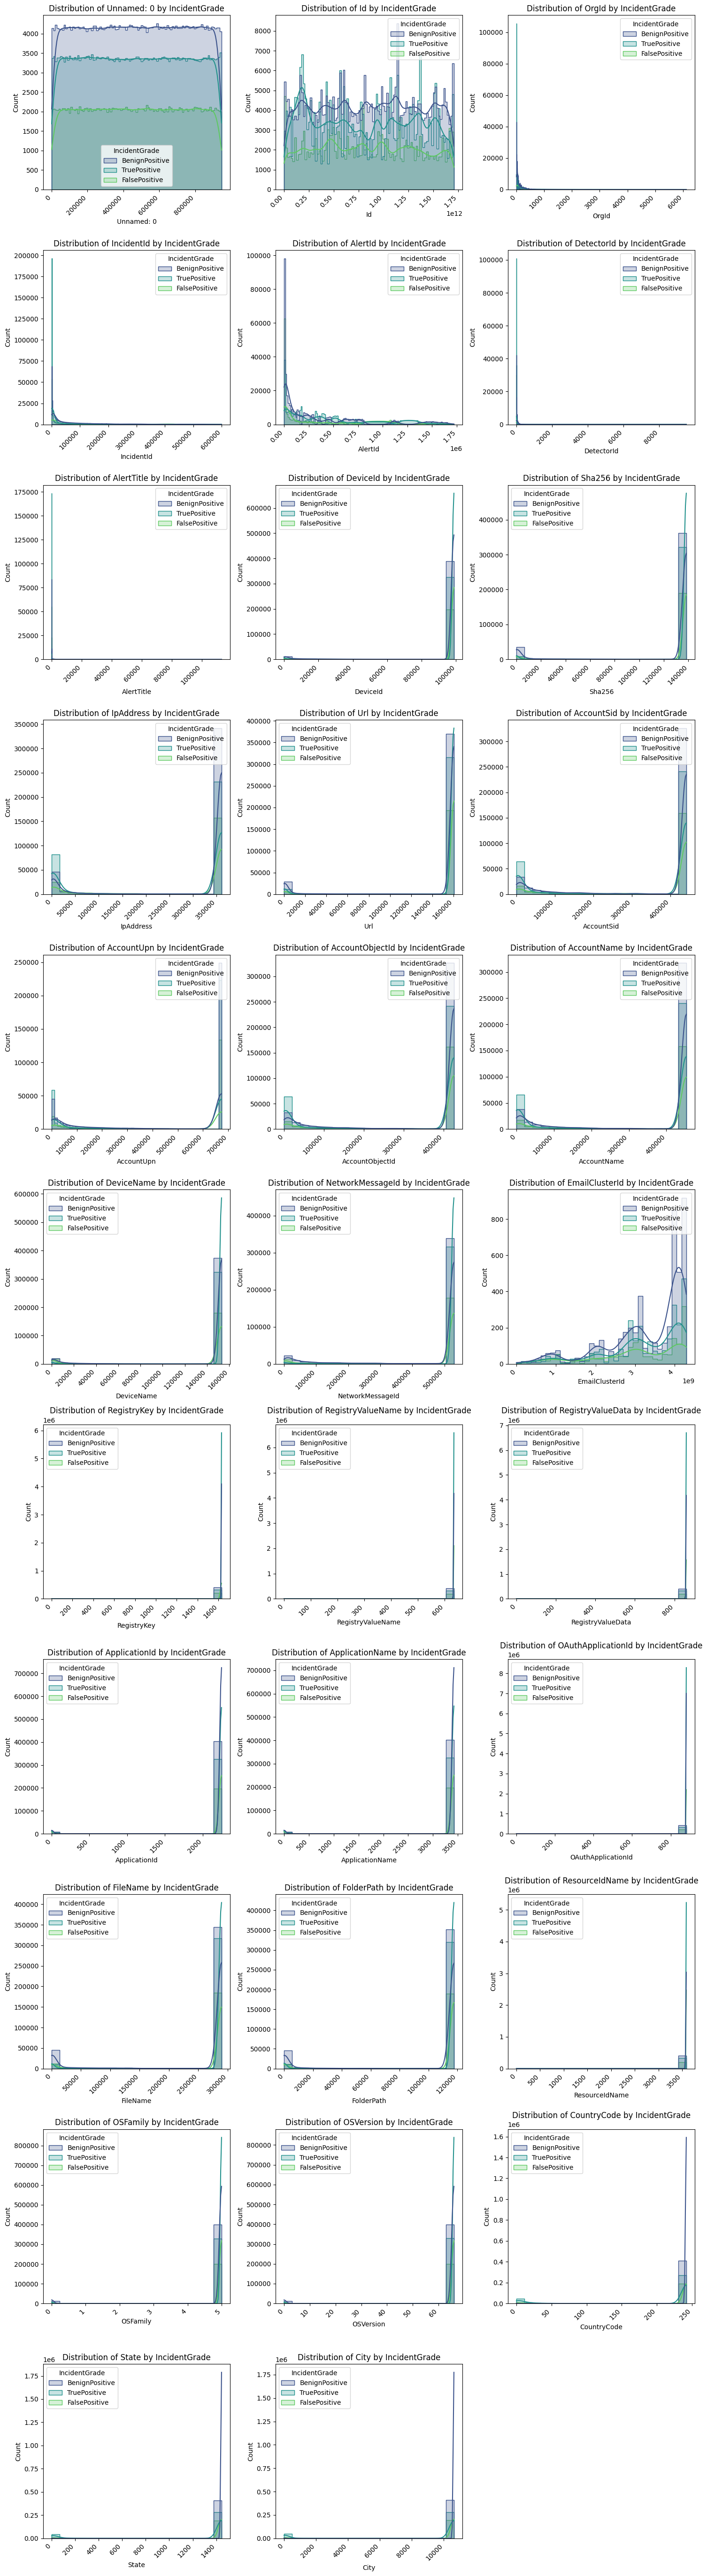

KeyError: "['DaysSinceLastLogin', 'NumberOfDevicesUsed', 'ActiveDays'] not in index"

In [ ]:
# prompt: Build colorful and better graphs to check relationship between different columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is already loaded as a pandas DataFrame

# Select numerical columns for plotting (excluding IncidentGrade itself)
numerical_cols = train_df.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col != 'IncidentGrade']

# Create subplots for each numerical column
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=train_df, x=col, hue='IncidentGrade', kde=True, element="step", palette="viridis") # Using histplot with KDE and a colorful palette
    plt.title(f'Distribution of {col} by IncidentGrade')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()

plt.show()


#Further analysis with pairplot for selected features
selected_features = ['IncidentGrade', 'DaysSinceLastLogin', 'NumberOfDevicesUsed', 'ActiveDays'] # Example features - replace with your choice
sns.pairplot(train_df[selected_features], hue='IncidentGrade', palette="magma") # Using a different color palette
plt.show()

#Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr() # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Use a diverging colormap
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Explorative Data Analysis - dont run

In [ ]:
print("Training DataFrame Columns and Data Types:")
print(train_df.dtypes)

Training DataFrame Columns and Data Types:
Unnamed: 0              int64
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int

#Exploring values in each of the categorical columns- dont run

In [ ]:
def explore_categorical_columns(df):
  """Explores categorical columns in a Pandas DataFrame and prints unique values."""
  for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical (object type)
      print(f"Column '{col}':")
      unique_values = df[col].unique()
      print(unique_values)
      print("-" * 20)

print("Categorical columns in train_df:")
explore_categorical_columns(train_df)



Categorical columns in train_df:
Column 'Timestamp':
['2024-06-06 13:39:23' '2024-06-03 17:05:40' '2024-06-05 20:45:37' ...
 '2024-06-12 14:58:29' '2024-06-13 10:57:45' '2024-06-05 08:14:54']
--------------------
Column 'Category':
['Exfiltration' 'Collection' 'CommandAndControl' 'InitialAccess'
 'Persistence' 'Execution' 'SuspiciousActivity' 'Impact'
 'CredentialAccess' 'Discovery' 'Malware' 'UnwantedSoftware'
 'DefenseEvasion' 'LateralMovement' 'Ransomware' 'PrivilegeEscalation'
 'Exploit' 'CredentialStealing' 'WebExploit']
--------------------
Column 'MitreTechniques':
[nan 'T1098;T1114' 'T1566' 'T1078;T1078.004' 'T1059.003' 'T1566.002'
 'T1110;T1110.003;T1110.001' 'T1133' 'T1087;T1087.002'
 'T1110;T1110.001;T1110.003' 'T1498' 'T1566.001' 'T1078;T1098' 'T1078'
 'T1027;T1204.002' 'T1057;T1059.001' 'T1046;T1071;T1210' 'T1055.001'
 'T1071;T1048' 'T1559;T1106;T1059.005' 'T1210' 'T1110;T1078' 'T1046'
 'T1021;T1021.004;T1043' 'T1071;T1571' 'T1537;T1567' 'T1586' 'T1485'
 'T1016;T1018;T1069

In [ ]:
train_df.head(10)

In [ ]:
mitre_techniques = ['T1098;T1114','T1566','T1078;T1078.004','T1059.003','T1566.002'
,'T1110;T1110.003;T1110.001','T1133','T1087;T1087.002'
,'T1110;T1110.001;T1110.003','T1498','T1566.001','T1078;T1098','T1078'
,'T1027;T1204.002','T1057;T1059.001','T1046;T1071;T1210','T1055.001'
,'T1071;T1048','T1559;T1106;T1059.005','T1210','T1110;T1078','T1046'
,'T1021;T1021.004;T1043','T1071;T1571','T1537;T1567','T1586','T1485'
,'T1016;T1018;T1069;T1087;T1482;T1069.002;T1087.002','T1055;T1105','T1190'
,'T1021','T1078;T1110','T1057;T1082','T1568;T1008','T1110'
,'T1027;T1027.002;T1027.005;T1105;T1204.002','T1030','T1059.001'
,'T1190;T1133','T1559;T0871;T0853;T0823;T0863','T1562'
,'T1566;T1193;T1566.001','T1055'
,'T1003.001;T1055;T1055.001;T1055.002;T1055.003;T1055.012;T1106;T1550.002'
,'T1112;T1547.001','T1105','T1041','T1046;T1030;T1071;T1071.001'
,'T1021.003;T1059.003','T1003;T1552.001','T1189;T1071;T1203','T1098'
,'T1071.001','T1568;T1573;T1008'
,'T1587;T1588;T1608;T1587.001;T1588.001;T1608.001','T1003;T1012;T1552.002'
,'T1007;T1016;T1018;T1049;T1082;T1087;T1135','T1595','T1543;T1543.002'
,'T1559','T1598;T1586;T1114;T1566','T1087','T1558.003','T1047;T1057'
,'T1003;T1098','T1204','T1056;T1056.001','T1087;T1110','T1640'
,'T1087.001;T1069.001;T1087.002','T1136;T1136.001','T1078.004'
,'T1098;T1078'
,'T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1053.005;T1569.002','T1059'
,'T1007;T1012;T1016;T1018;T1049;T1057;T1069.001;T1087;T1087.001;T1135'
,'T1003;T1005;T1119;T1539;T1550.004;T1552.001;T1555.003;T1555.004'
,'T1055;T1055.001;T1055.002;T1055.003;T1055.004;T1055.012;T1059.001'
,'T1102','T1059;T0853','T1021.003;T1047;T1059.001','T1007;T1059.001'
,'T1072;T1047','T1204.001','T1003','T1059.001;T1059.005;T1059.007'
,'T1550;T1550.002','T1007;T1016;T1018;T1049;T1082;T1087;T1135;T1615'
,'T1007;T1016;T1018;T1049;T1069.001;T1087;T1087.001;T1135'
,'T1110;T1110.003','T1562.010','T1110;T1110.001','T1528'
,'T1053.002;T1053.005','T1546.008','T1027.002;T1027.005;T1059.003;T1105'
,'T1074.001;T1560','T1003.001;T1550.002','T1052;T1567;T1537'
,'T1133;T1203;T1566','T1569','T1550;T1550.003','T1570','T1534'
,'T1016;T1047;T1049','T1557;T1110;T1212;T1539','T1485;T1565;T1491','T1189'
,'T1546.015','T1027.002;T1027.005;T1059.001;T1059.005;T1059.007;T1105'
,'T1047;T1518.001','T1569.002','T1036;T1218.011','T1053;T1053.005'
,'T1566.001;T1204.002'
,'T1021.002;T1074.002;T1078;T1078.003;T1080;T1543.003;T1569.002;T1570'
,'T1558;T1558.003','T1007;T1016;T1018;T1047;T1049;T1087;T1135;T1497.001'
,'T1137.005','T1557.001','T1027;T1027.003','T1543;T1543;T1543.003','T1550'
,'T1016;T1047;T1497.001','T1010;T1059.001;T1518','T1529','T1546.011'
,'T1021;T1021.002;T1059;T1074.002;T1078;T1078.002;T1080;T1543.003;T1570'
,'T1087.002;T1190','T1059.001;T1083;T1119;T1552.001;T1552.002','T1219'
,'T1564;T1564.008','T1595;T1590'
,'T1105;T1140;T1216;T1218;T1218.003;T1218.004;T1218.005;T1218.010;T1218.011;T1220'
,'T1059;T1080;T1140;T1203;T1204;T1218','T1189;T1566','T0820;T0816'
,'T1036;T1036.003','T1007;T1016;T1018;T1047;T1049;T1087;T1135;T1518.001'
,'T1098;T1556','T1496','T1070','T1564.003','T1204.002'
,'T1007;T1016;T1018;T1049;T1087;T1135','T1570;T1021.002','T1021.001;T1043'
,'T1036.004;T1053.005','T1534;T1114;T1564;T1070','T1555.003'
,'T1021.002;T1078;T1105;T1570','T1036','T1003;T1003.006','T1541;T1546'
,'T1021.002;T1074.002;T1078;T1078.002;T1080;T1543.003;T1569.002;T1570'
,'T1590','T1003;T1003.001;T1106;T1547.005','T1070.001','T1036.003'
,'T1016;T1016.001;T1047;T1082;T1190;T1505.003','T1489;T1543.003;T1569.002'
,'T1562.001;T1562.006','T1543;T1543.003'
,'T1055;T1055.001;T1055.002;T1055.003;T1055.004;T1055.012;T1059.001;T1106'
,'T1087;T1069;T1482;T1087.002;T1069.002','T1098;T1548'
,'T1003;T1201;T1552;T1555','T1564.008'
,'T1036;T1036.004;T1543.003;T1569.002;T1574.011','T1497.002'
,'T1548;T1203;T1190','T1074.001;T1560;T1560.001','T1557;T1539;T1598'
,'T1018;T1059.001','T1047;T1082;T1083;T1497.001'
,'T1018;T1059.001;T1069.002;T1087.002;T1087.003','T1548;T1574.002','T1629'
,'T1586;T1584','T1595;T1190','T1048;T1639;T1646','T1047;T1082;T1497.001'
,'T1018;T1033;T1069;T1069.002;T1087;T1087.002;T1135;T1558.003'
,'T1111;T1557','T1048;T1048.003','T1136','T1069.001;T1069.002'
,'T1222;T1222.001','T1192;T1194;T1193;T1566;T1566.003;T1566.002;T1566.001'
,'T1078;T1059;T1204;T0807;T1548','T1537','T1071','T1529;T0829;T0827'
,'T1007;T1016;T1018;T1047;T1049;T1069.001;T1082;T1087;T1087.001;T1135;T1497.001;T1518.001'
,'T1115','T1137;T1221','T1005','T1102;T1567','T1213'
,'T1021;T1021.003;T1021.006;T1027.002;T1027.005;T1105'
,'T1003;T1003.002;T1003.005;T1012','T1595;T1046'
,'T1055;T1055.004;T1055.012;T1106'
,'T1003.002;T1003.004;T1012;T1489;T1543.003','T1574.001;T1574.002'
,'T1048;T1011;T1567;T1567.002','T1539','T1546.001','T1078;T1136;T1087'
,'T1136;T1068','T1112;T1562.001','T1489'
,'T1036.004;T1059.003;T1543.003;T1569.002;T1574.011'
,'T1003;T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1559;T1569.002'
,'T1112;T1548.002','T1531','T1016;T1018;T1059.001','T1046;T1135;T1040'
,'T1055;T1055.001;T1055.002;T1055.003;T1055.004;T1055.005;T1055.012'
,'T1021.002;T1078;T1078.002;T1105;T1570','T1021.002'
,'T1003.002;T1003.003;T1003.004','T1112','T1057'
,'T1021.002;T1036.004;T1543.003;T1569.002;T1570;T1574.011'
,'T1003.001;T1112','T1007;T1016;T1018;T1049;T1057;T1059.001;T1087;T1135'
,'T1036.004;T1543.003;T1569.002;T1574.011'
,'T1570;T1021;T1021.002;T1021.003;T1021.004;T1021.006'
,'T1003;T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1489;T1543.003;T1559;T1569.002'
,'T1060','T1546.008;T1546.012','T1059.001;T1069.001','T1559;T1570'
,'T1021.002;T1047;T1550.002;T1569.002','T1546.015;T1559.001'
,'T1007;T1016;T1018;T1047;T1049;T1087;T1135;T1518','T1589;T1589.001'
,'T1021.002;T1039;T1053.005;T1059.001;T1078;T1489;T1562.001;T1570'
,'T1546.012','T1087;T1069;T1087.002;T1069.002'
,'T1078;T1136;T1087;T1078.004;T1136.003;T1087.004','T1547.001;T1547.009'
,'T1003;T1018;T1069.002;T1087.002;T1105;T1482;T1555;T1558.003;T1570'
,'T1213;T1213.002','T1021.003;T1047','T1033;T1047;T1087','T1105;T1570'
,'T1091','T1078;T1078.003','T0859','T1059.007','T1547.001'
,'T1021.002;T1074.002;T1078;T1080;T1543.003;T1569.002;T1570','T1082'
,'T1003;T1489;T1528;T1543.003','T1040','T1222;T1222.002'
,'T1021.006;T1027;T1204.002','T1486','T1003;T1012;T1074.001','T1053;T1176'
,'T1059;T1035','T1543.003','T1059.001;T1562.001;T1562.006','T1567.002'
,'T1003;T1087.002;T1098;T1649','T1021;T1021.004;T1105;T1204;T1204.002'
,'T1204.002;T1547.009;T1566.001','T1036;T1055;T1055.012;T1569.002','T1068'
,'T1059.001;T1486','T1036.001','T1490;T1561.002'
,'T1021.002;T1059.003;T1074.002;T1078;T1078.002;T1080;T1543.003;T1570'
,'T1078.003;T1098;T1136;T1136.001','T1059;T1059.007'
,'T1112;T1490;T1547.001'
,'T1036;T1080;T1204;T1218;T1534;T1566.001;T1566.003','T1047','T0838'
,'T1562;T1562.001;T1562.006','T1021;T1021.003;T1059.001','T1114'
,'T1574.001','T1021;T1105;T1543.003;T1569.002','T1534;T1564.008'
,'T1046;T1018','T1086;T1064','T1110.004;T1110.003','T1218.011'
,'T1021.002;T1027.002;T1027.005;T1047;T1105;T1570','T1003.005','T1490'
,'T1573;T1105;T1104;T0885;T1567','T1098;T1136;T1136.002','T1136;T1136.003'
,'T1114;T1114.003','T1047;T1082;T1087.001;T1135;T1518'
,'T1016;T1059.001;T1106'
,'T1007;T1016;T1018;T1021.001;T1033;T1049;T1087;T1135'
,'T1218.003;T1548.002'
,'T1021;T1036.004;T1105;T1543.003;T1569.002;T1574.011','T1003.002','T0807'
,'T1055;T1203','T1007;T1016;T1018;T1047;T1049;T1082;T1087;T1135'
,'T1218.010','T1003.001;T1021.002;T1550.002;T1570','T1110;T1212;T1087'
,'T1007;T1047;T1082;T1087.001','T1021;T1053.002;T1053.005;T1090.001;T1559'
,'T1021;T1021.003;T1021.006;T1059','T1005;T1119;T1552.001'
,'T0843;T0858;T0814','T1550;T1550.001','T1135;T1559','T1114;T1020'
,'T1027.002;T1027.005;T1105;T1218.005'
,'T1007;T1016;T1018;T1047;T1049;T1087;T1087.001;T1135'
,'T1003.001;T1055.002;T1550.002'
,'T1007;T1016;T1018;T1047;T1049;T1087;T1135','T1115;T1056.001'
,'T1078;T0859','T1069.001;T1098','T1564.004','T1572;T1018','T1547;T1112'
,'T1553','T1541','T1059;T1059.004','T1074','T1563.002'
,'T1033;T1059.001;T1087.001'
,'T1007;T1016;T1018;T1049;T1059.001;T1087;T1135'
,'T1021.002;T1036.004;T1047;T1059.003;T1543.003;T1569.002;T1574.011'
,'T1016;T1018;T1033;T1049;T1069.001;T1069.002;T1082;T1087;T1087.001;T1087.002;T1135;T1201'
,'T1003;T1021.001;T1105;T1219;T1555','T1018;T1069;T1087;T1136;T1482'
,'T1083;T1486;T1499','T1562.001','T1005;T1083;T1552;T1552.001','T1218.002'
,'T1059.005;T1059.007'
,'T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1489;T1543.003;T1559;T1569.002'
,'T1557;T1539','T1497.001;T1497.002;T1518.001','T1016;T1059.001'
,'T1052.001','T1053.002','T1547.004'
,'T1018;T1069;T1087;T1087.002;T1087.003;T1135;T1558.003'
,'T1059;T1203;T1559;T1106;T1053;T1129;T1072;T1569;T1204;T1047;T1071;T1092;T1132;T1001;T1568;T1008;T1105;T1104;T1095;T1571;T1572;T1090;T1219;T1205;T1102;T1548;T1134;T1197;T1612;T1140;T1610;T1006;T1484;T1211;T1564;T1574;T1562;T1070;T1202;T1036;T1556;T1112;T1601;T1027;T1542;T1055;T1207;T1218;T1216;T1553;T1221;T1127;T1550;T1078;T1497;T1600;T1220;T1210;T1563;T1021;T1091'
,'T1021.002;T1047;T1059.003;T1543.003'
,'T1007;T1016;T1018;T1049;T1087;T1135;T1574.007','T1057;T1106','T1078.002'
,'T1027.002;T1027.005;T1059.001;T1105','T1021.006','T1036.004;T1543.003'
,'T1110;T1212','T1651','T1003.001','T1200','T1016;T1047;T1482'
,'T1016;T1018;T1069;T1087;T1482','T1016;T1049;T1059.001','T1212'
,'T1070.004','T0865','T1078.003','T1528;T1550','T1203','T1560.001'
,'T1114.003','T1059;T1059.004;T1190;T1204;T1505;T1505.003','T1199','T1552'
,'T1053','T1021;T1021.003','T1548.003','T1059.003;T1082'
,'T1057;T1059.001;T1106','T1036.004;T1489;T1543.003;T1569.002;T1574.011'
,'T1098;T1136;T1136.001;T1136.002','T1003;T1003.002;T1003.004;T1012'
,'T1005;T1020;T1041;T1048;T1071;T1071.001;T1204.001;T1567;T1570','T1598'
,'T1055;T1055.001;T1055.002;T1055.003;T1055.012'
,'T1018;T1033;T1069;T1087;T1087.002;T1135;T1558.003'
,'T1064;T1086;T1028;T1059.001;T1569.002','T1136.001'
,'T1021.002;T1036.004;T1059.003;T1543.003;T1569.002;T1570;T1574.011'
,'T1110.003','T1021;T1021.004;T1071;T1078;T1078.003;T1105;T1204;T1204.002'
,'T1018;T1021','T1055;T1055.001;T1055.002;T1055.012','T1021.003'
,'T1129;T1218.001;T1218.003;T1218.010;T1218.011;T1620','T1021.006;T1047'
,'T1569;T1569.002','T1114.003;T1137.005','T1546.007'
,'T1021;T1036.004;T1543.003;T1569.002;T1574.011','T1505.003'
,'T1055;T1055.001;T1055.002;T1055.003;T1055.004;T1055.005;T1055.012;T1059.001'
,'T1218.009','T1566.002;T1204.001','T1027;T1047;T1204.002','T1555','T1612'
,'T1007;T1016;T1018;T1049;T1069.002;T1087;T1087.002;T1135;T1482'
,'T1007;T1016;T1016.001;T1018;T1049;T1057;T1069.001;T1087;T1087.001;T1135;T1518.001;T1569.002'
,'T1007;T1016;T1018;T1033;T1049;T1069;T1087;T1087.001;T1087.002;T1135'
,'T1087.002','T1018'
,'T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1559'
,'T1007;T1016;T1016.001;T1018;T1046;T1047;T1049;T1069.001;T1082;T1087;T1087.001;T1135;T1497.001;T1518.001'
,'T1007;T1016;T1018;T1049;T1087;T1135;T1518.001','T1098;T1098.001'
,'T1036;T1055;T1055.001;T1055.002;T1055.003;T1055.012;T1106','T1218.005'
,'T1113;T0852','T1021.006;T1218.011;T1220','T1643'
,'T1021;T1036.004;T1105;T1489;T1543.003;T1569.002;T1574.011'
,'T1007;T1016;T1018;T1033;T1047;T1049;T1057;T1082;T1087;T1087.001;T1135;T1497.001;T1518.001;T1543.003'
,'T1552.001','T1001;T1027;T1053;T1547.001','T1068;T1203;T1562'
,'T1003;T1005;T1027.002;T1027.005;T1105;T1119;T1539;T1550.004;T1552.001;T1555.003;T1555.004'
,'T1007;T1016;T1018;T1049;T1059.001;T1069.002;T1087;T1087.002;T1087.003;T1135'
,'T1110.002','T1516;T1595;T1046;T1418;T1421','T1036.004','T1546'
,'T1003;T1550.003','T1016;T1106','T1496;T1585','T1119;T1213.002'
,'T1003.001;T1055.001;T1055.002;T1055.012;T1550.002','T1218'
,'T1003;T1003.001','T1033;T1069.001;T1069.002;T1087;T1087.001;T1087.002'
,'T1048','T1548.004','T1218.004','T1037;T1037.001'
,'T1021;T1021.002;T1047;T1570','T1203;T1566.001','T1021;T1021.006'
,'T1021;T1021.002;T1569.002','T1059;T1059.004;T1204;T1222;T1222.002'
,'T1055.001;T1055.002;T1055.012;T1056;T1056.001','T1568','T1550.002'
,'T1085','T1003;T1555'
,'T1003;T1016;T1018;T1069.002;T1070.004;T1087.002;T1482'
,'T1069.001;T1069.002;T1087.001;T1087.002','T1135'
,'T1007;T1016;T1016.001;T1018;T1049;T1087;T1135','T1202'
,'T1007;T1012;T1016;T1018;T1033;T1047;T1049;T1069;T1069.001;T1082;T1087;T1087.001;T1087.002;T1135;T1497.001;T1518.001'
,'T1140;T1204.002;T1548.002;T1566.001;T1566.002','T1098;T1136;T1136.001'
,'T1113','T1082;T1614;T1016;T1049;T1497.001','T1033;T1047;T1087;T1087.001'
,'T1543.003;T1569.002','T1036;T1055.012;T1218.011','T1046;T1095;T1571'
,'T1556','T1021;T1021.003;T1027.002;T1027.005;T1059;T1105'
,'T1007;T1016;T1018;T1047;T1049;T1082;T1083;T1087;T1135;T1497.001'
,'T1598;T1566','T1003;T1005;T1555;T1555.003;T1555.004','T1012;T1497.001'
,'T1548','T1090.003','T1087;T1057;T1087.001;T1069.001;T1518.001'
,'T1562.004','T1007;T1010;T1016;T1018;T1049;T1059.001;T1087;T1135;T1518'
,'T1136.002'
,'T1007;T1016;T1016.001;T1018;T1046;T1049;T1069.001;T1087;T1087.001;T1135;T1518.001'
,'T1007;T1016;T1016.001;T1018;T1033;T1046;T1047;T1049;T1069;T1069.001;T1082;T1087;T1087.001;T1087.002;T1135;T1497.001;T1518.001'
,'T1566;T1566.002'
,'T1007;T1016;T1018;T1047;T1049;T1082;T1087;T1135;T1497.001','T1071;T1481'
,'T1027.004','T1199;T1136;T1078;T1098','T0840','T1558','T1021;T1105'
,'T1007;T1016;T1018;T1027.002;T1027.005;T1049;T1087;T1105;T1135'
,'T0836;T1562;T1562.001','T1021;T1078'
,'T1021.002;T1543.003;T1569.002;T1570','T1566;T1566.002;T1566.003'
,'T1584;T1584.007','T0855','T1016','T1203;T1204'
,'T1007;T1012;T1016;T1018;T1049;T1087;T1135;T1497.001'
,'T1003;T1003.002;T1003.005','T1064','T1086','T1555;T1078'
,'T1007;T1016;T1018;T1033;T1047;T1049;T1057;T1082;T1087;T1087.001;T1135;T1201;T1497.001'
,'T1005;T1083','T1021.003;T1027;T1204.002'
,'T1016;T1018;T1069;T1069.002;T1087;T1087.002;T1482','T1112;T1546.011'
,'T1087.001','T1059;T1059.003','T0863'
,'T1021.002;T1027.002;T1027.005;T1039;T1047;T1105;T1570'
,'T1608;T1222;T1199','T1018;T1069;T1087;T1087.002;T1135;T1558.003'
,'T1007;T1016;T1018;T1033;T1049;T1087;T1087.001;T1135'
,'T1021.002;T1047;T1059.003;T1543.003;T1569.002'
,'T1003.002;T1003.004;T1012','T1021.003;T1021.006;T1059.001'
,'T1016;T1082;T1087;T1482'
,'T1018;T1033;T1069;T1082;T1087;T1087.002;T1135;T1558.003'
,'T1007;T1012;T1016;T1018;T1049;T1087;T1135'
,'T1007;T1016;T1018;T1049;T1087;T1135;T1201'
,'T1543.003;T1569.002;T1574.011','T1543;T1219','T1078;T1136;T1136.001'
,'T1059;T1027;T1140','T1567','T1183','T1087;T1204.001'
,'T1007;T1016;T1018;T1049;T1083;T1087;T1135'
,'T1003;T1003.002;T1003.004;T1012;T1489;T1543.003','T1018;T1082'
,'T1021;T1053.005;T1059','T1078;T1210','T1589;T1078','T1218.003;T1220'
,'T1137','T1016;T1033;T1047;T1049;T1087.001','T1090;T1219','T1020'
,'T1003;T1012;T1083;T1552.001;T1552.002','T1612;T1562;T1569;T0807'
,'T1053.005','T1021;T1047;T1105;T1569.002','T1069.002'
,'T1007;T1016;T1018;T1049;T1069.001;T1069.002;T1087;T1087.001;T1135'
,'T1557;T1111;T1566'
,'T1007;T1016;T1018;T1021.001;T1033;T1049;T1069.001;T1069.002;T1087;T1087.001;T1087.002;T1135;T1482;T1569.002'
,'T1207','T1105;T1071.001','T1053.002;T1059.001','T1098;T1087;T1585;T1078'
,'T1021.002;T1047;T1570'
,'T1036.004;T1543.003;T1569.002;T1574.010;T1574.011','T1189;T1190'
,'T1078.003;T1078.002','T1584;T1584.005','T1484'
,'T1007;T1016;T1018;T1049;T1057;T1059.001;T1087;T1106;T1135','T1546.002'
,'T1218.008'
,'T1007;T1016;T1018;T1033;T1047;T1049;T1057;T1069.001;T1087;T1087.001;T1135'
,'T1566;T1078','T1188','T1190;T1210','T1047;T1135','T1053;T1053.002'
,'T1003;T1016;T1018;T1069.002;T1087.002;T1482','T1057;T1059.001;T1082'
,'T1005;T1087.003;T1114;T1114.001','T1547'
,'T1016;T1033;T1069.001;T1069.002;T1082;T1087;T1087.001;T1087.002;T1201'
,'T1562.003','T1112;T1562.001;T1562.006','T1021;T1021.003;T1047;T1059'
,'T1011','T1547.014','T1102;T1190;T1133','T0865;T1566'
,'T1018;T1057;T1016;T1087.001;T1087.002;T1069.001;T1069.002','T1003.003'
,'T1043;T1071;T1071.001;T1568','T1021.006;T1210','T1078;T1490'
,'T1021.002;T1059.001;T1074.002;T1078;T1078.002;T1080;T1543.003;T1570'
,'T1033;T1106','T1112;T1543.003;T1547.001'
,'T1027.009;T1056.001;T1082;T1204;T1216;T1218;T1222.001'
,'T1059.003;T1543.003'
,'T1027;T1027.002;T1027.005;T1105;T1204.002;T1547.001','T1564.005'
,'T1047;T1082;T1087.001;T1135','T1007;T1047;T1543.003','T1530;T1213;T1020'
,'T1574','T1036;T1036.003;T1087;T1087.002','T1036;T1036.005','T1208'
,'T1021.003;T1036.003','T1021.002;T1047;T1057;T1570','T1047;T1497.001'
,'T1543;T1068','T1021.002;T1059.001'
,'T1005;T1020;T1041;T1048;T1071;T1071.001;T1567;T1570','T1548.002'
,'T1566;T1098;T1559;T1055','T1574.002;T1574.001'
,'T1003;T1003.002;T1003.004;T1003.005;T1012','T1047;T1082;T1547.001'
,'T1028;T1570;T1210;T1021.006;T1021.002','T1036.005'
,'T1059;T1203;T1559;T1072;T0863;T0807','T1110;T1110.003;T1110.002'
,'T1003;T1005;T1055;T1055.003;T1055.012;T1106;T1119;T1539;T1550.004;T1552.001;T1555.003;T1555.004'
,'T1021.002;T1204','T1105;T1027'
,'T1007;T1016;T1016.001;T1018;T1046;T1049;T1087;T1135','T1021.001'
,'T1070;T1070.002;T1565.001','T1547;T1547.012','T1583'
,'T1027;T1027.002;T1027.005;T1059.001;T1105;T1204.002','T1574.002'
,'T1046;T1135;T1018'
,'T1007;T1016;T1018;T1033;T1049;T1082;T1087;T1087.001;T1087.002;T1135'
,'T1087;T1049;T1087.002','T1016;T1018;T1069.002;T1087.002;T1482','T1191'
,'T1106;T1134.004','T1496;T1559','T1185','T1078.001;T1078.003'
,'T1003;T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1489;T1543.003;T1559'
,'T1059.001;T1543.003','T1218.007','T1614.001','T1140','T1087;T1105;T1133'
,'T1106;T1135','T1621;T1078','T1590;T1046','T1565'
,'T1007;T1016;T1016.001;T1018;T1049;T1057;T1069.001;T1087;T1087.001;T1135;T1569.002'
,'T1482'
,'T1020;T1041;T1048;T1071;T1071.001;T1564;T1564.001;T1567;T1567.002'
,'T1111;T1557;T1566','T1021;T1059;T1543.003'
,'T1003;T1005;T1047;T1119;T1539;T1550.004;T1552.001;T1555.003;T1555.004'
,'T1036;T0849;T1534','T1485;T0828;T1562','T1021.002;T1059.001;T1074'
,'T1055.012','T1027;T1204.002;T1543.003','T1547;T1547.005','T1562.002'
,'T1021;T1021.004;T1071;T1078;T1078.003;T1105;T1202;T1204'
,'T1056;T1059.001','T1211;T1053','T1095','T1566;T1199','T1055;T1059'
,'T1007;T1016;T1018;T1049;T1087;T1135;T1558','T1047;T1069.001','T1205'
,'T0890','T1055;T1057','T1114.002','T1055;T1055.003;T1055.012;T1071;T1106'
,'T1003;T1134','T1571'
,'T1021;T1021.002;T1039;T1053.005;T1059.001;T1078;T1489;T1562.001;T1570'
,'T1021.002;T1570','T1027','T1078;T1517','T1007;T1497.001'
,'T1005;T1011;T1020;T1041;T1048;T1048.003;T1074.001;T1560;T1567'
,'T1021;T1047','T1548;T1203;T1190;T1087','T1003;T1555;T1555.003;T1555.004'
,'T1187','T1007;T1016;T1018;T1049;T1057;T1087;T1135','T1499'
,'T1064;T1569;T1047;T1204.002;T1059.001'
,'T1007;T1016;T1018;T1049;T1087;T1135;T1614.001'
,'T1016;T1033;T1069;T1082;T1204.001;T1550.002;T1550.003','T1546.003'
,'T0863;T1546;T1133;T0889','T1505.004','T1053;T1546.015;T1559.001','T0886'
,'T1071;T1218.011','T1027.002;T1027.005;T1059.003;T1105;T1547.001'
,'T1137;T1137.006','T1016;T1018;T1069.002;T1087.002;T1087.003;T1482'
,'T1037;T1543;T1546','T1547.010'
,'T1027;T1027.002;T1027.005;T1105;T1204.002;T1546.008;T1546.012'
,'T1021.003;T1027.002;T1027.005;T1059.001;T1105','T1203;T0863'
,'T0853;T0807','T1083;T1552.001;T1552.002','T1041;T1567'
,'T1007;T1016;T1018;T1047;T1049;T1069.002;T1087;T1087.002;T1135;T1482'
,'T1059.001;T1547.001','T1547.012'
,'T1018;T1021.001;T1033;T1087;T1105;T1190;T1505.003;T1570','T1090'
,'T1007;T1016;T1016.001;T1018;T1033;T1047;T1049;T1057;T1069.002;T1082;T1087;T1087.001;T1087.002;T1135;T1497.001;T1518.001;T1569.002;T1614;T1614.001'
,'T1134','T1046;T1595','T1021;T1047;T1105'
,'T1007;T1016;T1018;T1033;T1047;T1049;T1087;T1087.001;T1135'
,'T1566;T1199;T1566.002;T1566.001','T1572'
,'T1003;T1003.008;T1005;T1074;T1074.001;T1087;T1087.001;T1119;T1528;T1552.001'
,'T1053.005;T1059.003','T1033;T1059.001;T1106','T1021.002;T1543.003'
,'T1071;T1203;T1189','T1027;T1059.001'
,'T1033;T1047;T1082;T1083;T1087;T1087.001;T1135;T1497.001','T1056.003'
,'T1005;T1016;T1049;T1059;T1059.004;T1083;T1204','T1556;T1558;T1578'
,'T1059;T1574;T1087;T1082','T1021.003;T1490','T1218;T1554'
,'T1021;T1021.002;T1047;T1053.002;T1053.005;T1059.003;T1090.001;T1559'
,'T1027.002;T1027.005;T1036.004;T1105;T1543.003'
,'T1071;T1566;T1078;T1204;T1534;T1190','T1546.010','T1021.001;T1563'
,'T1027.002;T1027.005;T1047;T1059.003;T1105','T1525'
,'T1003;T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1559'
,'T1021.002;T1036;T1036.004;T1053;T1053.005;T1570'
,'T1001;T1006;T1008;T1021;T1027;T1036;T1047;T1053;T1055;T1059;T1070;T1071;T1072;T1078;T1090;T1091;T1092;T1095;T1102;T1104;T1105;T1106;T1112;T1127;T1129;T1132;T1134;T1140;T1197;T1202;T1203;T1204;T1205;T1207;T1210;T1211;T1216;T1218;T1219;T1220;T1221;T1484;T1497;T1542;T1548;T1550;T1553;T1556;T1559;T1562;T1563;T1564;T1568;T1569;T1571;T1572;T1574;T1600;T1601;T1610;T1612'
,'T1003;T1055.001;T1055.002;T1055.012;T1134;T1528;T1556','T1059;T1059.001'
,'T1531;T1110','T1047;T1082;T1087.001','T1059.006'
,'T1087;T1201;T1110;T1078'
,'T1021;T1021.002;T1036.004;T1543.003;T1569.002;T1570;T1574.011'
,'T1055;T1055.001;T1055.002;T1055.003;T1055.004;T1055.005;T1055.012;T1059.001;T1106'
,'T1003;T1003.002','T1003.001;T1543.003','T1210;T1563;T1021;T1080;T1550'
,'T1603','T1003;T1059.001','T1111;T1621','T1041;T1071;T1071.001'
,'T1566;T1193;T1192;T1566.002;T1566.001','T1059.001;T1106;T1482'
,'T1016;T1018;T1033;T1069.001;T1069.002;T1087;T1087.001;T1087.002;T1135;T1136;T1201'
,'T1070.001;T1562.002','T1586;T1585;T1114','T1021.006;T1047;T1059.001'
,'T1114;T1505.002','T1055.002;T1056;T1056.001','T1566;T1192;T1193'
,'T1046;T1498','T1003;T1003.002;T1003.004;T1012;T1021.002;T1039'
,'T1212;T1098','T1558;T1558.001','T1047;T1124','T1083;T1190;T1505.003'
,'T1125','T1059;T1059.004;T1129','T1018;T1112;T1486'
,'T1018;T1069.002;T1087.002;T1105;T1482;T1570'
,'T1064;T1204;T1059.001;T1569.002;T1059.004;T1059.003'
,'T1030;T1041;T1071.004;T1132','T1090;T1560','T1203;T1189','T1071;T1003'
,'T1070;T1070.004','T1059.001;T1087.002','T1003;T1059.001;T1555'
,'T1055;T1059.001','T1081;T1552','T1021.001;T1105;T1219;T1558.003'
,'T1059.005','T1021;T1021.002;T1053.002;T1053.005;T1090.001;T1559'
,'T1003;T1528;T1552;T1552.001'
,'T1021;T1036.004;T1489;T1543.003;T1569.002;T1574.011','T0858'
,'T1552.001;T1555.003;T1555.004'
,'T1027;T1027.002;T1027.005;T1105;T1204.002;T1218.011'
,'T1021;T1021.002;T1027.002;T1027.005;T1047;T1105;T1570'
,'T1036;T1543.003;T1569.002','T1564;T1564.006','T1547.006'
,'T1059;T1059.001;T1059.003','T1059;T1059.004;T1082;T1204'
,'T1007;T1016;T1018;T1049;T1059.001;T1083;T1087;T1135','T1003.004;T1057'
,'T1210;T0860;T0817;T0866;T1557','T1105;T1204;T1204.002'
,'T1003;T1087.002;T1528','T1556;T1556.001'
,'T1007;T1016;T1018;T1049;T1087;T1087.001;T1106;T1135','T1070;T1562'
,'T1111;T1098;T1078','T1564.001','T1021.002;T1074.002;T1078;T1080;T1570'
,'T1021;T1105;T1550.002','T1053.005;T1059.001','T1078;T1212;T1078.003'
,'T1098.001','T1134.004','T1021;T1021.002;T1039;T1047;T1570','T1219;T1572'
,'T1546.013','T1546;T1546.013','T1068;T1134;T1134.001'
,'T1003;T1005;T1055.002;T1119;T1539;T1550.004;T1552.001;T1555.003;T1555.004'
,'T1098;T1626;T1078;T1585;T1588','T1110;T1078;T1087'
,'T1021;T1021.004;T1071;T1078;T1078.003;T1105;T1204;T1204.002;T1570'
,'T1547.009'
,'T1003;T1018;T1068;T1069.002;T1087.002;T1105;T1482;T1555;T1570'
,'T1016;T1057','T1071.001;T1203','T1056.001;T1082;T1083','T1030;T1048.003'
,'T1074.002;T1113;T1115'
,'T1018;T1033;T1069;T1069.002;T1087;T1087.002;T1135;T1201;T1558.003'
,'T1111;T1557;T1566.002','T1018;T1069;T1069.002;T1087;T1087.002;T1482'
,'T1552;T1552.004','T1112;T1070','T1557','T1078;T1059;T1651'
,'T1110;T1078;T1110.004;T1110.003','T1020;T1041;T1048'
,'T1033;T1069;T1082;T1083;T1087;T1087.001;T1087.002;T1190;T1505.003'
,'T1021;T1021.002;T1039;T1053.005;T1059.001;T1570'
,'T1018;T1059.001;T1087;T1119','T1204;T1204.002','T1021.004'
,'T1007;T1016;T1018;T1033;T1049;T1059.001;T1087;T1087.001;T1135'
,'T1036.005;T1053;T1543.003;T1547.001','T1078;T1078.002','T1484;T0859'
,'T1070.004;T1070.006'
,'T1003.002;T1003.004;T1012;T1021;T1090.001;T1112;T1559;T1569.002'
,'T1069;T1087;T1069.001;T1069.002;T1087.001'
,'T1016;T1018;T1021.001;T1033;T1059.001;T1069;T1082;T1087.002;T1484;T1555'
,'T1059.001;T1095','T1566;T1078;T1078.003;T1566.002;T1566.001'
,'T1565;T1565.001','T1556;T1204;T1189','T1012;T1071.003;T1114.001;T1552'
,'T1036.005;T1574.001;T1574.002','T1574.010'
,'T1007;T1016;T1018;T1049;T1059.003;T1083;T1087;T1135'
,'T1548;T1203;T1190;T1595;T1046'
,'T1007;T1016;T1016.001;T1018;T1046;T1049;T1087;T1135;T1518.001'
,'T1070.008'
,'T1007;T1016;T1016.001;T1018;T1021.001;T1033;T1049;T1069.001;T1087;T1087.001;T1135;T1569.002'
,'T0859;T1078;T1098;T1586'
,'T1018;T1069;T1087;T1087.002;T1135;T1482;T1558.003'
,'T1005;T1007;T1016;T1018;T1049;T1059.001;T1083;T1087;T1135','T1562.009'
,'T1003.003;T1105;T1570','T1016;T1082;T1190;T1505.003'
,'T1007;T1016;T1018;T1049;T1087;T1135;T1482','T1021.002;T1053;T1570'
,'T0820;T0853;T0807;T0866','T1211','T1003;T1528','T1083;T1202'
,'T1072;T1651'
,'T1021.002;T1036.004;T1074.002;T1078;T1078.002;T1080;T1543.003;T1569.002;T1570;T1574.011'
,'T1222.001','T1064;T1204'
,'T1016;T1018;T1033;T1049;T1069.001;T1069.002;T1087;T1087.001;T1087.002;T1135'
,'T1090.001;T1572','T1049;T1106;T1135','T1018;T1021;T1071.004'
,'T1053;T1218.010'
,'T1003;T1003.002;T1003.004;T1012;T1489;T1543.003;T1569.002'
,'T1046;T1105;T1219;T1570;T1595','T1620','T1586;T1114'
,'T1018;T1059.001;T1135','T1033;T1083;T1018;T1069','T1543'
,'T1070;T1070.004;T1204;T1204.002;T1562.004;T1562.006'
,'T1003;T1007;T1012;T1016;T1018;T1049;T1087;T1135;T1552.002'
,'T0849;T1078;T1564','T1078;T1543.003;T1569.002'
,'T1011;T1020;T1041;T1048;T1048.003;T1567','T1036.004;T1036.008'
,'T1550;T1550.002;T1550.003'
,'T1027;T1027.002;T1027.005;T1105;T1204.002;T1560'
,'T1087;T1087.001;T1069.001','T1562;T0836;T1562.007','T1554'
,'T1087;T1078;T1136','T1037.001','T1078;T1078.003;T1078.002'
,'T1016;T1059;T1059.004;T1204;T1614'
,'T1016;T1018;T1033;T1049;T1069.001;T1069.002;T1087;T1087.001;T1087.002;T1135;T1201'
,'T1535','T1055.001;T1055.002;T1055.012;T1078','T1204;T0863'
,'T1016;T1033;T1049;T1069.001;T1069.002;T1082;T1087;T1087.001;T1087.002;T1135;T1201'
,'T1204;T1578','T1106;T1112','T1056','T1003;T1201;T1552;T1552.001;T1555'
,'T1061;T1059','T1059.001;T1204'
,'T1007;T1016;T1016.001;T1018;T1047;T1049;T1057;T1082;T1087;T1087.001;T1135;T1497.001'
,'T1021;T1136.001','T1021;T1021.003;T1047','T1047;T1059.001'
,'T1059.001;T1087','T1056;T1056.001;T1106'
,'T1018;T1069;T1087;T1135;T1558.003','T1216'
,'T1033;T1047;T1082;T1087;T1087.001;T1135','T1578','T1482;T1021'
,'T1110;T1212;T1190;T1078','T1007','T1213;T1530;T1039'
,'T1068;T1528;T1552;T1555;T1558'
,'T1526;T1087;T1087.004;T1087.002;T1069.002;T1087.003'
,'T1187;T1204.002;T1547.009;T1566.001','T1033','T1003.008'
,'T1007;T1016;T1018;T1049;T1087;T1106;T1135'
,'T1005;T1007;T1016;T1018;T1049;T1083;T1087;T1119;T1135','T1003;T1057'
,'T1106;T1548;T1548.001','T1039','T0807;T1204'
,'T1566.003;T1566.001;T1566.002','T0820;T1203;T1204']

In [ ]:
unique_MT = set()

for i in mitre_techniques:
    values = set(i.split(';'))
    unique_MT = unique_MT|values

In [ ]:
len(unique_MT)

396

#Web scraping to get the Mitre Values - dont run

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_data(url):
    """
    Scrapes data from a URL and extracts values.

    Args:
      url: The URL to scrape.

    Returns:
      A set of unique text values and a dictionary of href-to-text mappings.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes

        soup = BeautifulSoup(response.content, 'html.parser')

        # Containers for results
        values = set()  # Unique text values
        dict_values = {}  # Dictionary of href to text

        # Extracting 'a' tag information
        for tag in soup.find_all('a'):  # Find all anchor tags
            text = tag.get_text(strip=True)  # Extract and clean the text
            href = tag.get('href')  # Extract the href attribute

            if text:  # Ensure the text is not empty
                values.add(text)

            if href:  # Ensure the href is not empty
                list_values = href.split('/')
                key= '.'.join(list_values[-1*len(list_values)+1:])
                dict_values[key] = text

        return values, dict_values

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None


# Example usage (replace with your actual URL)
url_to_scrape = "https://attack.mitre.org/"
unique_values, href_to_text = scrape_data(url_to_scrape)

if unique_values:
    print("Unique values scraped:")
    for value in unique_values:
        print(value)
    print(f"Total unique values: {len(unique_values)}\n")

    print("Href-to-Text Dictionary:")
    for href, text in href_to_text.items():
        print(f"{href}: {text}")


Unique values scraped:
Domain Properties
AutoHotKey & AutoIT
SyncAppvPublishingServer
Binary Padding
Regsvcs/Regasm
Cron
Sharepoint
Resource Development
Web Portal Capture
Terms of Use
Hijack Execution Flow(13)
Modify Registry
RDP Hijacking
Malware
Remote Email Collection
Exfiltration to Cloud Storage
Private Keys
Bootkit
Multi-Factor Authentication
WHOIS
Shortcut Modification
Credentials in Registry
Unsecured Credentials(8)
Steganography
Screensaver
Gather Victim Host Information(4)
Spearphishing Attachment
Spoof Security Alerting
System Time Discovery
Data Source
Defenses
Video Capture
Hidden File System
Network Device Configuration Dump
Client Configurations
Path Interception by PATH Environment Variable
Event Triggered Execution(17)
Steal or Forge Kerberos Tickets(5)
Linux and Mac File and Directory Permissions Modification
Group
Network Security Appliances
Inter-Process Communication(3)
Re-opened Applications
flat
Scan Databases
Ptrace System Calls
Exploitation for Defense Evasion

In [ ]:
mitre_tech_dict = {
'TA0043':'Reconnaissance',
'TA0042':'Resource Development',
'TA0001':'Initial Access',
'TA0002':'Execution',
'TA0003':'Persistence',
'TA0004':'Privilege Escalation',
'TA0005':'Defense Evasion',
'TA0006':'Credential Access',
'TA0007':'Discovery',
'TA0008':'Lateral Movement',
'TA0009':'Collection',
'TA0011':'Command and Control',
'TA0010':'Exfiltration',
'TA0040':'Impact',
'T1595':'Active Scanning(3)',
'T1595.001':'Scanning IP Blocks',
'T1595.002':'Vulnerability Scanning',
'T1595.003':'Wordlist Scanning',
'T1592':'Gather Victim Host Information(4)',
'T1592.001':'Hardware',
'T1592.002':'Software',
'T1592.003':'Firmware',
'T1592.004':'Client Configurations',
'T1589':'Gather Victim Identity Information(3)',
'T1589.001':'Credentials',
'T1589.002':'Email Addresses',
'T1589.003':'Employee Names',
'T1590':'Gather Victim Network Information(6)',
'T1590.001':'Domain Properties',
'T1590.002':'DNS',
'T1590.003':'Network Trust Dependencies',
'T1590.004':'Network Topology',
'T1590.005':'IP Addresses',
'T1590.006':'Network Security Appliances',
'T1591':'Gather Victim Org Information(4)',
'T1591.001':'Determine Physical Locations',
'T1591.002':'Business Relationships',
'T1591.003':'Identify Business Tempo',
'T1591.004':'Identify Roles',
'T1598':'Phishing for Information(4)',
'T1598.001':'Spearphishing Service',
'T1598.002':'Spearphishing Attachment',
'T1598.003':'Spearphishing Link',
'T1598.004':'Spearphishing Voice',
'T1597':'Search Closed Sources(2)',
'T1597.001':'Threat Intel Vendors',
'T1597.002':'Purchase Technical Data',
'T1596':'Search Open Technical Databases(5)',
'T1596.001':'DNS/Passive DNS',
'T1596.002':'WHOIS',
'T1596.003':'Digital Certificates',
'T1596.004':'CDNs',
'T1596.005':'Scan Databases',
'T1593':'Search Open Websites/Domains(3)',
'T1593.001':'Social Media',
'T1593.002':'Search Engines',
'T1593.003':'Code Repositories',
'T1594':'Search Victim-Owned Websites',
'T1650':'Acquire Access',
'T1583':'Acquire Infrastructure(8)',
'T1583.001':'Domains',
'T1583.002':'DNS Server',
'T1583.003':'Virtual Private Server',
'T1583.004':'Server',
'T1583.005':'Botnet',
'T1583.006':'Web Services',
'T1583.007':'Serverless',
'T1583.008':'Malvertising',
'T1586':'Compromise Accounts(3)',
'T1586.001':'Social Media Accounts',
'T1586.002':'Email Accounts',
'T1586.003':'Cloud Accounts',
'T1584':'Compromise Infrastructure(8)',
'T1584.001':'Domains',
'T1584.002':'DNS Server',
'T1584.003':'Virtual Private Server',
'T1584.004':'Server',
'T1584.005':'Botnet',
'T1584.006':'Web Services',
'T1584.007':'Serverless',
'T1584.008':'Network Devices',
'T1587':'Develop Capabilities(4)',
'T1587.001':'Malware',
'T1587.002':'Code Signing Certificates',
'T1587.003':'Digital Certificates',
'T1587.004':'Exploits',
'T1585':'Establish Accounts(3)',
'T1585.001':'Social Media Accounts',
'T1585.002':'Email Accounts',
'T1585.003':'Cloud Accounts',
'T1588':'Obtain Capabilities(7)',
'T1588.001':'Malware',
'T1588.002':'Tool',
'T1588.003':'Code Signing Certificates',
'T1588.004':'Digital Certificates',
'T1588.005':'Exploits',
'T1588.006':'Vulnerabilities',
'T1588.007':'Artificial Intelligence',
'T1608':'Stage Capabilities(6)',
'T1608.001':'Upload Malware',
'T1608.002':'Upload Tool',
'T1608.003':'Install Digital Certificate',
'T1608.004':'Drive-by Target',
'T1608.005':'Link Target',
'T1608.006':'SEO Poisoning',
'T1659':'Content Injection',
'T1189':'Drive-by Compromise',
'T1190':'Exploit Public-Facing Application',
'T1133':'External Remote Services',
'T1200':'Hardware Additions',
'T1566':'Phishing(4)',
'T1566.001':'Spearphishing Attachment',
'T1566.002':'Spearphishing Link',
'T1566.003':'Spearphishing via Service',
'T1566.004':'Spearphishing Voice',
'T1091':'Replication Through Removable Media',
'T1195':'Supply Chain Compromise(3)',
'T1195.001':'Compromise Software Dependencies and Development Tools',
'T1195.002':'Compromise Software Supply Chain',
'T1195.003':'Compromise Hardware Supply Chain',
'T1199':'Trusted Relationship',
'T1078':'Valid Accounts(4)',
'T1078.001':'Default Accounts',
'T1078.002':'Domain Accounts',
'T1078.003':'Local Accounts',
'T1078.004':'Cloud Accounts',
'T1651':'Cloud Administration Command',
'T1059':'Command and Scripting Interpreter(11)',
'T1059.001':'PowerShell',
'T1059.002':'AppleScript',
'T1059.003':'Windows Command Shell',
'T1059.004':'Unix Shell',
'T1059.005':'Visual Basic',
'T1059.006':'Python',
'T1059.007':'JavaScript',
'T1059.008':'Network Device CLI',
'T1059.009':'Cloud API',
'T1059.010':'AutoHotKey & AutoIT',
'T1059.011':'Lua',
'T1609':'Container Administration Command',
'T1610':'Deploy Container',
'T1203':'Exploitation for Client Execution',
'T1559':'Inter-Process Communication(3)',
'T1559.001':'Component Object Model',
'T1559.002':'Dynamic Data Exchange',
'T1559.003':'XPC Services',
'T1106':'Native API',
'T1053':'Scheduled Task/Job(5)',
'T1053.002':'At',
'T1053.003':'Cron',
'T1053.005':'Scheduled Task',
'T1053.006':'Systemd Timers',
'T1053.007':'Container Orchestration Job',
'T1648':'Serverless Execution',
'T1129':'Shared Modules',
'T1072':'Software Deployment Tools',
'T1569':'System Services(2)',
'T1569.001':'Launchctl',
'T1569.002':'Service Execution',
'T1204':'User Execution(3)',
'T1204.001':'Malicious Link',
'T1204.002':'Malicious File',
'T1204.003':'Malicious Image',
'T1047':'Windows Management Instrumentation',
'T1098':'Account Manipulation(7)',
'T1098.001':'Additional Cloud Credentials',
'T1098.002':'Additional Email Delegate Permissions',
'T1098.003':'Additional Cloud Roles',
'T1098.004':'SSH Authorized Keys',
'T1098.005':'Device Registration',
'T1098.006':'Additional Container Cluster Roles',
'T1098.007':'Additional Local or Domain Groups',
'T1197':'BITS Jobs',
'T1547':'Boot or Logon Autostart Execution(14)',
'T1547.001':'Registry Run Keys / Startup Folder',
'T1547.002':'Authentication Package',
'T1547.003':'Time Providers',
'T1547.004':'Winlogon Helper DLL',
'T1547.005':'Security Support Provider',
'T1547.006':'Kernel Modules and Extensions',
'T1547.007':'Re-opened Applications',
'T1547.008':'LSASS Driver',
'T1547.009':'Shortcut Modification',
'T1547.010':'Port Monitors',
'T1547.012':'Print Processors',
'T1547.013':'XDG Autostart Entries',
'T1547.014':'Active Setup',
'T1547.015':'Login Items',
'T1037':'Boot or Logon Initialization Scripts(5)',
'T1037.001':'Logon Script (Windows)',
'T1037.002':'Login Hook',
'T1037.003':'Network Logon Script',
'T1037.004':'RC Scripts',
'T1037.005':'Startup Items',
'T1176':'Browser Extensions',
'T1554':'Compromise Host Software Binary',
'T1136':'Create Account(3)',
'T1136.001':'Local Account',
'T1136.002':'Domain Account',
'T1136.003':'Cloud Account',
'T1543':'Create or Modify System Process(5)',
'T1543.001':'Launch Agent',
'T1543.002':'Systemd Service',
'T1543.003':'Windows Service',
'T1543.004':'Launch Daemon',
'T1543.005':'Container Service',
'T1546':'Event Triggered Execution(17)',
'T1546.001':'Change Default File Association',
'T1546.002':'Screensaver',
'T1546.003':'Windows Management Instrumentation Event Subscription',
'T1546.004':'Unix Shell Configuration Modification',
'T1546.005':'Trap',
'T1546.006':'LC_LOAD_DYLIB Addition',
'T1546.007':'Netsh Helper DLL',
'T1546.008':'Accessibility Features',
'T1546.009':'AppCert DLLs',
'T1546.010':'AppInit DLLs',
'T1546.011':'Application Shimming',
'T1546.012':'Image File Execution Options Injection',
'T1546.013':'PowerShell Profile',
'T1546.014':'Emond',
'T1546.015':'Component Object Model Hijacking',
'T1546.016':'Installer Packages',
'T1546.017':'Udev Rules',
'T1574':'Hijack Execution Flow(13)',
'T1574.001':'DLL Search Order Hijacking',
'T1574.002':'DLL Side-Loading',
'T1574.004':'Dylib Hijacking',
'T1574.005':'Executable Installer File Permissions Weakness',
'T1574.006':'Dynamic Linker Hijacking',
'T1574.007':'Path Interception by PATH Environment Variable',
'T1574.008':'Path Interception by Search Order Hijacking',
'T1574.009':'Path Interception by Unquoted Path',
'T1574.010':'Services File Permissions Weakness',
'T1574.011':'Services Registry Permissions Weakness',
'T1574.012':'COR_PROFILER',
'T1574.013':'KernelCallbackTable',
'T1574.014':'AppDomainManager',
'T1525':'Implant Internal Image',
'T1556':'Modify Authentication Process(9)',
'T1556.001':'Domain Controller Authentication',
'T1556.002':'Password Filter DLL',
'T1556.003':'Pluggable Authentication Modules',
'T1556.004':'Network Device Authentication',
'T1556.005':'Reversible Encryption',
'T1556.006':'Multi-Factor Authentication',
'T1556.007':'Hybrid Identity',
'T1556.008':'Network Provider DLL',
'T1556.009':'Conditional Access Policies',
'T1137':'Office Application Startup(6)',
'T1137.001':'Office Template Macros',
'T1137.002':'Office Test',
'T1137.003':'Outlook Forms',
'T1137.004':'Outlook Home Page',
'T1137.005':'Outlook Rules',
'T1137.006':'Add-ins',
'T1653':'Power Settings',
'T1542':'Pre-OS Boot(5)',
'T1542.001':'System Firmware',
'T1542.002':'Component Firmware',
'T1542.003':'Bootkit',
'T1542.004':'ROMMONkit',
'T1542.005':'TFTP Boot',
'T1505':'Server Software Component(5)',
'T1505.001':'SQL Stored Procedures',
'T1505.002':'Transport Agent',
'T1505.003':'Web Shell',
'T1505.004':'IIS Components',
'T1505.005':'Terminal Services DLL',
'T1205':'Traffic Signaling(2)',
'T1205.001':'Port Knocking',
'T1205.002':'Socket Filters',
'T1548':'Abuse Elevation Control Mechanism(6)',
'T1548.001':'Setuid and Setgid',
'T1548.002':'Bypass User Account Control',
'T1548.003':'Sudo and Sudo Caching',
'T1548.004':'Elevated Execution with Prompt',
'T1548.005':'Temporary Elevated Cloud Access',
'T1548.006':'TCC Manipulation',
'T1134':'Access Token Manipulation(5)',
'T1134.001':'Token Impersonation/Theft',
'T1134.002':'Create Process with Token',
'T1134.003':'Make and Impersonate Token',
'T1134.004':'Parent PID Spoofing',
'T1134.005':'SID-History Injection',
'T1484':'Domain or Tenant Policy Modification(2)',
'T1484.001':'Group Policy Modification',
'T1484.002':'Trust Modification',
'T1611':'Escape to Host',
'T1068':'Exploitation for Privilege Escalation',
'T1055':'Process Injection(12)',
'T1055.001':'Dynamic-link Library Injection',
'T1055.002':'Portable Executable Injection',
'T1055.003':'Thread Execution Hijacking',
'T1055.004':'Asynchronous Procedure Call',
'T1055.005':'Thread Local Storage',
'T1055.008':'Ptrace System Calls',
'T1055.009':'Proc Memory',
'T1055.011':'Extra Window Memory Injection',
'T1055.012':'Process Hollowing',
'T1055.013':'Process Doppelgänging',
'T1055.014':'VDSO Hijacking',
'T1055.015':'ListPlanting',
'T1612':'Build Image on Host',
'T1622':'Debugger Evasion',
'T1140':'Deobfuscate/Decode Files or Information',
'T1006':'Direct Volume Access',
'T1480':'Execution Guardrails(2)',
'T1480.001':'Environmental Keying',
'T1480.002':'Mutual Exclusion',
'T1211':'Exploitation for Defense Evasion',
'T1222':'File and Directory Permissions Modification(2)',
'T1222.001':'Windows File and Directory Permissions Modification',
'T1222.002':'Linux and Mac File and Directory Permissions Modification',
'T1564':'Hide Artifacts(12)',
'T1564.001':'Hidden Files and Directories',
'T1564.002':'Hidden Users',
'T1564.003':'Hidden Window',
'T1564.004':'NTFS File Attributes',
'T1564.005':'Hidden File System',
'T1564.006':'Run Virtual Instance',
'T1564.007':'VBA Stomping',
'T1564.008':'Email Hiding Rules',
'T1564.009':'Resource Forking',
'T1564.010':'Process Argument Spoofing',
'T1564.011':'Ignore Process Interrupts',
'T1564.012':'File/Path Exclusions',
'T1562':'Impair Defenses(11)',
'T1562.001':'Disable or Modify Tools',
'T1562.002':'Disable Windows Event Logging',
'T1562.003':'Impair Command History Logging',
'T1562.004':'Disable or Modify System Firewall',
'T1562.006':'Indicator Blocking',
'T1562.007':'Disable or Modify Cloud Firewall',
'T1562.008':'Disable or Modify Cloud Logs',
'T1562.009':'Safe Mode Boot',
'T1562.010':'Downgrade Attack',
'T1562.011':'Spoof Security Alerting',
'T1562.012':'Disable or Modify Linux Audit System',
'T1656':'Impersonation',
'T1070':'Indicator Removal(10)',
'T1070.001':'Clear Windows Event Logs',
'T1070.002':'Clear Linux or Mac System Logs',
'T1070.003':'Clear Command History',
'T1070.004':'File Deletion',
'T1070.005':'Network Share Connection Removal',
'T1070.006':'Timestomp',
'T1070.007':'Clear Network Connection History and Configurations',
'T1070.008':'Clear Mailbox Data',
'T1070.009':'Clear Persistence',
'T1070.010':'Relocate Malware',
'T1202':'Indirect Command Execution',
'T1036':'Masquerading(10)',
'T1036.001':'Invalid Code Signature',
'T1036.002':'Right-to-Left Override',
'T1036.003':'Rename System Utilities',
'T1036.004':'Masquerade Task or Service',
'T1036.005':'Match Legitimate Name or Location',
'T1036.006':'Space after Filename',
'T1036.007':'Double File Extension',
'T1036.008':'Masquerade File Type',
'T1036.009':'Break Process Trees',
'T1036.010':'Masquerade Account Name',
'T1578':'Modify Cloud Compute Infrastructure(5)',
'T1578.001':'Create Snapshot',
'T1578.002':'Create Cloud Instance',
'T1578.003':'Delete Cloud Instance',
'T1578.004':'Revert Cloud Instance',
'T1578.005':'Modify Cloud Compute Configurations',
'T1666':'Modify Cloud Resource Hierarchy',
'T1112':'Modify Registry',
'T1601':'Modify System Image(2)',
'T1601.001':'Patch System Image',
'T1601.002':'Downgrade System Image',
'T1599':'Network Boundary Bridging(1)',
'T1599.001':'Network Address Translation Traversal',
'T1027':'Obfuscated Files or Information(14)',
'T1027.001':'Binary Padding',
'T1027.002':'Software Packing',
'T1027.003':'Steganography',
'T1027.004':'Compile After Delivery',
'T1027.005':'Indicator Removal from Tools',
'T1027.006':'HTML Smuggling',
'T1027.007':'Dynamic API Resolution',
'T1027.008':'Stripped Payloads',
'T1027.009':'Embedded Payloads',
'T1027.010':'Command Obfuscation',
'T1027.011':'Fileless Storage',
'T1027.012':'LNK Icon Smuggling',
'T1027.013':'Encrypted/Encoded File',
'T1027.014':'Polymorphic Code',
'T1647':'Plist File Modification',
'T1620':'Reflective Code Loading',
'T1207':'Rogue Domain Controller',
'T1014':'Rootkit',
'T1553':'Subvert Trust Controls(6)',
'T1553.001':'Gatekeeper Bypass',
'T1553.002':'Code Signing',
'T1553.003':'SIP and Trust Provider Hijacking',
'T1553.004':'Install Root Certificate',
'T1553.005':'Mark-of-the-Web Bypass',
'T1553.006':'Code Signing Policy Modification',
'T1218':'System Binary Proxy Execution(14)',
'T1218.001':'Compiled HTML File',
'T1218.002':'Control Panel',
'T1218.003':'CMSTP',
'T1218.004':'InstallUtil',
'T1218.005':'Mshta',
'T1218.007':'Msiexec',
'T1218.008':'Odbcconf',
'T1218.009':'Regsvcs/Regasm',
'T1218.010':'Regsvr32',
'T1218.011':'Rundll32',
'T1218.012':'Verclsid',
'T1218.013':'Mavinject',
'T1218.014':'MMC',
'T1218.015':'Electron Applications',
'T1216':'System Script Proxy Execution(2)',
'T1216.001':'PubPrn',
'T1216.002':'SyncAppvPublishingServer',
'T1221':'Template Injection',
'T1127':'Trusted Developer Utilities Proxy Execution(2)',
'T1127.001':'MSBuild',
'T1127.002':'ClickOnce',
'T1535':'Unused/Unsupported Cloud Regions',
'T1550':'Use Alternate Authentication Material(4)',
'T1550.001':'Application Access Token',
'T1550.002':'Pass the Hash',
'T1550.003':'Pass the Ticket',
'T1550.004':'Web Session Cookie',
'T1497':'Virtualization/Sandbox Evasion(3)',
'T1497.001':'System Checks',
'T1497.002':'User Activity Based Checks',
'T1497.003':'Time Based Evasion',
'T1600':'Weaken Encryption(2)',
'T1600.001':'Reduce Key Space',
'T1600.002':'Disable Crypto Hardware',
'T1220':'XSL Script Processing',
'T1557':'Adversary-in-the-Middle(4)',
'T1557.001':'LLMNR/NBT-NS Poisoning and SMB Relay',
'T1557.002':'ARP Cache Poisoning',
'T1557.003':'DHCP Spoofing',
'T1557.004':'Evil Twin',
'T1110':'Brute Force(4)',
'T1110.001':'Password Guessing',
'T1110.002':'Password Cracking',
'T1110.003':'Password Spraying',
'T1110.004':'Credential Stuffing',
'T1555':'Credentials from Password Stores(6)',
'T1555.001':'Keychain',
'T1555.002':'Securityd Memory',
'T1555.003':'Credentials from Web Browsers',
'T1555.004':'Windows Credential Manager',
'T1555.005':'Password Managers',
'T1555.006':'Cloud Secrets Management Stores',
'T1212':'Exploitation for Credential Access',
'T1187':'Forced Authentication',
'T1606':'Forge Web Credentials(2)',
'T1606.001':'Web Cookies',
'T1606.002':'SAML Tokens',
'T1056':'Input Capture(4)',
'T1056.001':'Keylogging',
'T1056.002':'GUI Input Capture',
'T1056.003':'Web Portal Capture',
'T1056.004':'Credential API Hooking',
'T1111':'Multi-Factor Authentication Interception',
'T1621':'Multi-Factor Authentication Request Generation',
'T1040':'Network Sniffing',
'T1003':'OS Credential Dumping(8)',
'T1003.001':'LSASS Memory',
'T1003.002':'Security Account Manager',
'T1003.003':'NTDS',
'T1003.004':'LSA Secrets',
'T1003.005':'Cached Domain Credentials',
'T1003.006':'DCSync',
'T1003.007':'Proc Filesystem',
'T1003.008':'/etc/passwd and /etc/shadow',
'T1528':'Steal Application Access Token',
'T1649':'Steal or Forge Authentication Certificates',
'T1558':'Steal or Forge Kerberos Tickets(5)',
'T1558.001':'Golden Ticket',
'T1558.002':'Silver Ticket',
'T1558.003':'Kerberoasting',
'T1558.004':'AS-REP Roasting',
'T1558.005':'Ccache Files',
'T1539':'Steal Web Session Cookie',
'T1552':'Unsecured Credentials(8)',
'T1552.001':'Credentials In Files',
'T1552.002':'Credentials in Registry',
'T1552.003':'Bash History',
'T1552.004':'Private Keys',
'T1552.005':'Cloud Instance Metadata API',
'T1552.006':'Group Policy Preferences',
'T1552.007':'Container API',
'T1552.008':'Chat Messages',
'T1087':'Account Discovery(4)',
'T1087.001':'Local Account',
'T1087.002':'Domain Account',
'T1087.003':'Email Account',
'T1087.004':'Cloud Account',
'T1010':'Application Window Discovery',
'T1217':'Browser Information Discovery',
'T1580':'Cloud Infrastructure Discovery',
'T1538':'Cloud Service Dashboard',
'T1526':'Cloud Service Discovery',
'T1619':'Cloud Storage Object Discovery',
'T1613':'Container and Resource Discovery',
'T1652':'Device Driver Discovery',
'T1482':'Domain Trust Discovery',
'T1083':'File and Directory Discovery',
'T1615':'Group Policy Discovery',
'T1654':'Log Enumeration',
'T1046':'Network Service Discovery',
'T1135':'Network Share Discovery',
'T1201':'Password Policy Discovery',
'T1120':'Peripheral Device Discovery',
'T1069':'Permission Groups Discovery(3)',
'T1069.001':'Local Groups',
'T1069.002':'Domain Groups',
'T1069.003':'Cloud Groups',
'T1057':'Process Discovery',
'T1012':'Query Registry',
'T1018':'Remote System Discovery',
'T1518':'Software Discovery(1)',
'T1518.001':'Security Software Discovery',
'T1082':'System Information Discovery',
'T1614':'System Location Discovery(1)',
'T1614.001':'System Language Discovery',
'T1016':'System Network Configuration Discovery(2)',
'T1016.001':'Internet Connection Discovery',
'T1016.002':'Wi-Fi Discovery',
'T1049':'System Network Connections Discovery',
'T1033':'System Owner/User Discovery',
'T1007':'System Service Discovery',
'T1124':'System Time Discovery',
'T1210':'Exploitation of Remote Services',
'T1534':'Internal Spearphishing',
'T1570':'Lateral Tool Transfer',
'T1563':'Remote Service Session Hijacking(2)',
'T1563.001':'SSH Hijacking',
'T1563.002':'RDP Hijacking',
'T1021':'Remote Services(8)',
'T1021.001':'Remote Desktop Protocol',
'T1021.002':'SMB/Windows Admin Shares',
'T1021.003':'Distributed Component Object Model',
'T1021.004':'SSH',
'T1021.005':'VNC',
'T1021.006':'Windows Remote Management',
'T1021.007':'Cloud Services',
'T1021.008':'Direct Cloud VM Connections',
'T1080':'Taint Shared Content',
'T1560':'Archive Collected Data(3)',
'T1560.001':'Archive via Utility',
'T1560.002':'Archive via Library',
'T1560.003':'Archive via Custom Method',
'T1123':'Audio Capture',
'T1119':'Automated Collection',
'T1185':'Browser Session Hijacking',
'T1115':'Clipboard Data',
'T1530':'Data from Cloud Storage',
'T1602':'Data from Configuration Repository(2)',
'T1602.001':'SNMP (MIB Dump)',
'T1602.002':'Network Device Configuration Dump',
'T1213':'Data from Information Repositories(5)',
'T1213.001':'Confluence',
'T1213.002':'Sharepoint',
'T1213.003':'Code Repositories',
'T1213.004':'Customer Relationship Management Software',
'T1213.005':'Messaging Applications',
'T1005':'Data from Local System',
'T1039':'Data from Network Shared Drive',
'T1025':'Data from Removable Media',
'T1074':'Data Staged(2)',
'T1074.001':'Local Data Staging',
'T1074.002':'Remote Data Staging',
'T1114':'Email Collection(3)',
'T1114.001':'Local Email Collection',
'T1114.002':'Remote Email Collection',
'T1114.003':'Email Forwarding Rule',
'T1113':'Screen Capture',
'T1125':'Video Capture',
'T1071':'Application Layer Protocol(5)',
'T1071.001':'Web Protocols',
'T1071.002':'File Transfer Protocols',
'T1071.003':'Mail Protocols',
'T1071.004':'DNS',
'T1071.005':'Publish/Subscribe Protocols',
'T1092':'Communication Through Removable Media',
'T1132':'Data Encoding(2)',
'T1132.001':'Standard Encoding',
'T1132.002':'Non-Standard Encoding',
'T1001':'Data Obfuscation(3)',
'T1001.001':'Junk Data',
'T1001.002':'Steganography',
'T1001.003':'Protocol or Service Impersonation',
'T1568':'Dynamic Resolution(3)',
'T1568.001':'Fast Flux DNS',
'T1568.002':'Domain Generation Algorithms',
'T1568.003':'DNS Calculation',
'T1573':'Encrypted Channel(2)',
'T1573.001':'Symmetric Cryptography',
'T1573.002':'Asymmetric Cryptography',
'T1008':'Fallback Channels',
'T1665':'Hide Infrastructure',
'T1105':'Ingress Tool Transfer',
'T1104':'Multi-Stage Channels',
'T1095':'Non-Application Layer Protocol',
'T1571':'Non-Standard Port',
'T1572':'Protocol Tunneling',
'T1090':'Proxy(4)',
'T1090.001':'Internal Proxy',
'T1090.002':'External Proxy',
'T1090.003':'Multi-hop Proxy',
'T1090.004':'Domain Fronting',
'T1219':'Remote Access Software',
'T1102':'Web Service(3)',
'T1102.001':'Dead Drop Resolver',
'T1102.002':'Bidirectional Communication',
'T1102.003':'One-Way Communication',
'T1020':'Automated Exfiltration(1)',
'T1020.001':'Traffic Duplication',
'T1030':'Data Transfer Size Limits',
'T1048':'Exfiltration Over Alternative Protocol(3)',
'T1048.001':'Exfiltration Over Symmetric Encrypted Non-C2 Protocol',
'T1048.002':'Exfiltration Over Asymmetric Encrypted Non-C2 Protocol',
'T1048.003':'Exfiltration Over Unencrypted Non-C2 Protocol',
'T1041':'Exfiltration Over C2 Channel',
'T1011':'Exfiltration Over Other Network Medium(1)',
'T1011.001':'Exfiltration Over Bluetooth',
'T1052':'Exfiltration Over Physical Medium(1)',
'T1052.001':'Exfiltration over USB',
'T1567':'Exfiltration Over Web Service(4)',
'T1567.001':'Exfiltration to Code Repository',
'T1567.002':'Exfiltration to Cloud Storage',
'T1567.003':'Exfiltration to Text Storage Sites',
'T1567.004':'Exfiltration Over Webhook',
'T1029':'Scheduled Transfer',
'T1537':'Transfer Data to Cloud Account',
'T1531':'Account Access Removal',
'T1485':'Data Destruction(1)',
'T1485.001':'Lifecycle-Triggered Deletion',
'T1486':'Data Encrypted for Impact',
'T1565':'Data Manipulation(3)',
'T1565.001':'Stored Data Manipulation',
'T1565.002':'Transmitted Data Manipulation',
'T1565.003':'Runtime Data Manipulation',
'T1491':'Defacement(2)',
'T1491.001':'Internal Defacement',
'T1491.002':'External Defacement',
'T1561':'Disk Wipe(2)',
'T1561.001':'Disk Content Wipe',
'T1561.002':'Disk Structure Wipe',
'T1499':'Endpoint Denial of Service(4)',
'T1499.001':'OS Exhaustion Flood',
'T1499.002':'Service Exhaustion Flood',
'T1499.003':'Application Exhaustion Flood',
'T1499.004':'Application or System Exploitation',
'T1657':'Financial Theft',
'T1495':'Firmware Corruption',
'T1490':'Inhibit System Recovery',
'T1498':'Network Denial of Service(2)',
'T1498.001':'Direct Network Flood',
'T1498.002':'Reflection Amplification',
'T1496':'Resource Hijacking(4)',
'T1496.001':'Compute Hijacking',
'T1496.002':'Bandwidth Hijacking',
'T1496.003':'SMS Pumping',
'T1496.004':'Cloud Service Hijacking',
'T1489':'Service Stop',
'T1529':'System Shutdown/Reboot'}

In [ ]:
mitre_tech_dict = href_to_text

cleaned_mitre_tech_dict = {}

for key, value in mitre_tech_dict.items():
    new_key = key.replace(".","") # Remove '.'
    cleaned_mitre_tech_dict[new_key] = value

for key, value in cleaned_mitre_tech_dict.items():
    print(f"{key}: {value}")

mitre_tech_dict = cleaned_mitre_tech_dict

: flat
enterprise: Enterprise
mobile: Mobile
ics: ICS
datasources: Data Sources
assets: Assets
groups: Groups
software: Software
campaigns: Campaigns
learn-more-about-attack: Learn More about ATT&CK
attackcon: ATT&CKcon
attack-data-and-tools: ATT&CK Data & Tools
faq: FAQ
engage-with-attackcontact: Contact Us
versions: Version History
legal-and-branding: Legal & Branding
engage-with-attackbenefactors: Benefactors
mediumcommitre-attack: Blog
mediumcommitre-attackattack-v16-561c76af94cf: blog post
engage-with-attackcontribute: Contribute
TA0043: Reconnaissance
TA0042: Resource Development
TA0001: Initial Access
TA0002: Execution
TA0003: Persistence
TA0004: Privilege Escalation
TA0005: Defense Evasion
TA0006: Credential Access
TA0007: Discovery
TA0008: Lateral Movement
TA0009: Collection
TA0011: Command and Control
TA0010: Exfiltration
TA0040: Impact
T1595: Active Scanning(3)
T1595001: Scanning IP Blocks
T1595002: Vulnerability Scanning
T1595003: Wordlist Scanning
T1592: Gather Victim Host

In [ ]:
href_to_text

{'.': '',
 '': 'flat',
 'enterprise.': 'Enterprise',
 'mobile.': 'Mobile',
 'ics.': 'ICS',
 '.datasources': 'Data Sources',
 '.assets': 'Assets',
 '.groups': 'Groups',
 '.software': 'Software',
 '.campaigns': 'Campaigns',
 'learn-more-about-attack.': 'Learn More about ATT&CK',
 'attackcon.': 'ATT&CKcon',
 'attack-data-and-tools.': 'ATT&CK Data & Tools',
 'faq.': 'FAQ',
 'engage-with-attack.contact.': 'Engage with ATT&CK',
 'versions.': 'Version History',
 'legal-and-branding.': 'Legal & Branding',
 'engage-with-attack.benefactors.': 'Benefactors',
 'medium.com.mitre-attack.': 'Blog',
 'medium.com.mitre-attack.attack-v16-561c76af94cf': 'blog post',
 'engage-with-attack.contribute': 'Contribute',
 'medium.com.mitre-attack': 'Blog',
 'faq': 'FAQ',
 'TA0043': 'Reconnaissance',
 'TA0042': 'Resource Development',
 'TA0001': 'Initial Access',
 'TA0002': 'Execution',
 'TA0003': 'Persistence',
 'TA0004': 'Privilege Escalation',
 'TA0005': 'Defense Evasion',
 'TA0006': 'Credential Access',
 'TA0

In [ ]:
mitre_tech_dict

{'': 'flat',
 'enterprise': 'Enterprise',
 'mobile': 'Mobile',
 'ics': 'ICS',
 'datasources': 'Data Sources',
 'assets': 'Assets',
 'groups': 'Groups',
 'software': 'Software',
 'campaigns': 'Campaigns',
 'learn-more-about-attack': 'Learn More about ATT&CK',
 'attackcon': 'ATT&CKcon',
 'attack-data-and-tools': 'ATT&CK Data & Tools',
 'faq': 'FAQ',
 'engage-with-attackcontact': 'Contact Us',
 'versions': 'Version History',
 'legal-and-branding': 'Legal & Branding',
 'engage-with-attackbenefactors': 'Benefactors',
 'mediumcommitre-attack': 'Blog',
 'mediumcommitre-attackattack-v16-561c76af94cf': 'blog post',
 'engage-with-attackcontribute': 'Contribute',
 'TA0043': 'Reconnaissance',
 'TA0042': 'Resource Development',
 'TA0001': 'Initial Access',
 'TA0002': 'Execution',
 'TA0003': 'Persistence',
 'TA0004': 'Privilege Escalation',
 'TA0005': 'Defense Evasion',
 'TA0006': 'Credential Access',
 'TA0007': 'Discovery',
 'TA0008': 'Lateral Movement',
 'TA0009': 'Collection',
 'TA0011': 'Command

#Exploring numeric columns their values and correlation between the columns - dont run

In [ ]:
numeric_cols = train_df.select_dtypes(include=['number']).columns

# Display first 10 values for each numeric column
for col_name in numeric_cols:
    print(f"First 10 values of {col_name}:")
    print(train_df[col_name].head(10))
    print("-" * 20)

First 10 values of Unnamed: 0:
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64
--------------------
First 10 values of Id:
0    1400159339557
1     635655163305
2    1546188229482
3     249108107265
4    1245540520650
5    1460288882423
6    1563368099767
7    1649267445072
8     489626275922
9     592705487586
Name: Id, dtype: int64
--------------------
First 10 values of OrgId:
0     125
1     261
2      34
3     108
4      91
5       0
6      10
7       2
8      20
9    1199
Name: OrgId, dtype: int64
--------------------
First 10 values of IncidentId:
0     38679
1    110412
2    329953
3    144844
4       628
5       136
6     60285
7     11558
8     30308
9      9878
Name: IncidentId, dtype: int64
--------------------
First 10 values of AlertId:
0      47423
1      41503
2     709535
3     118616
4      36262
5    1202920
6    1161589
7       7722
8     281035
9      90522
Name: AlertId, dtype: int64
--------------------
First 1

## Exploring numeric columns that are actually categorical

In [ ]:
numeric_cols

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId',
       'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath',
       'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State',
       'City'],
      dtype='object')

In [ ]:
# num_cat = ['City','State','CountryCode','OSVersion','OSFamily','FolderPath',"FileName",'ResourceIdName']

In [ ]:
len(train_df[['OSFamily','OSVersion']].value_counts())

28

In [ ]:
os_family_dict = {
    0:'Linux',
    1:'MacOS',
    2:'Unix',
    5:'Windows'
}

In [ ]:
train_df['OSFamily'].value_counts()

,count
OSFamily,
5,927508
0,18851
1,293
2,156


In [ ]:
train_df['OSVersion'].value_counts()

28

#Find correlation with independent variables - dont run

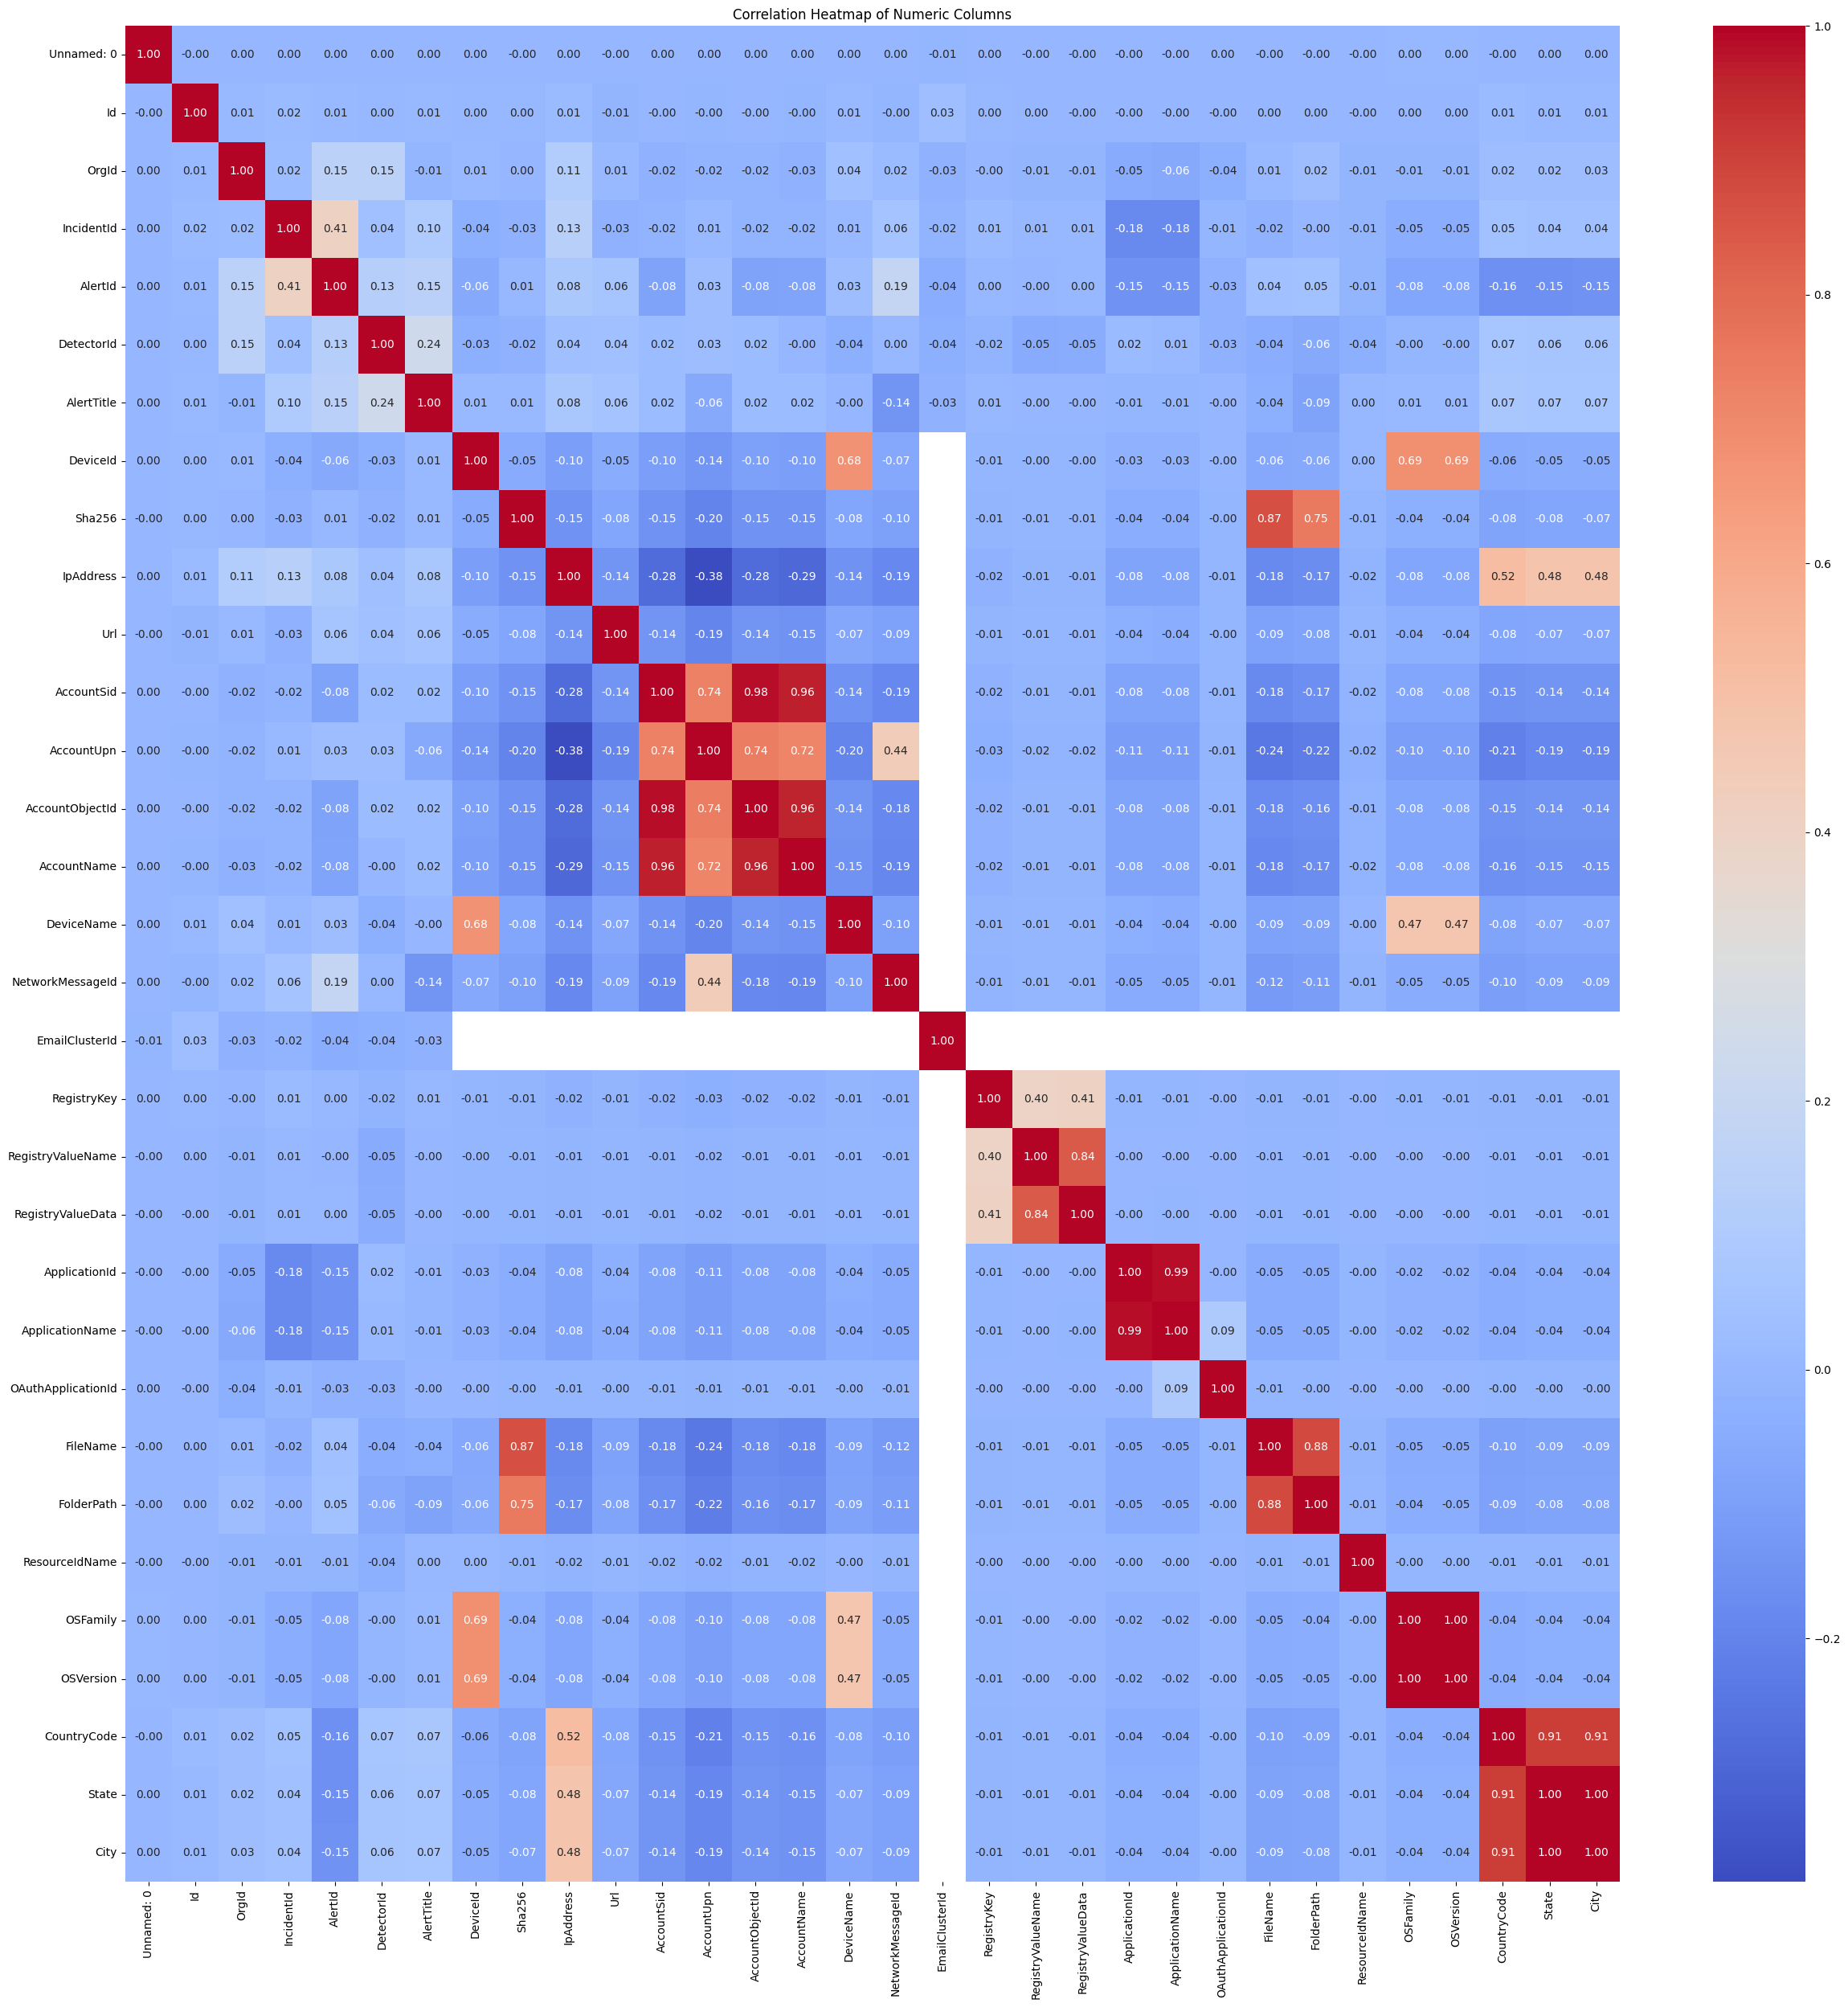

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_df' is your DataFrame
# and numeric_cols is defined as in your previous code

# Calculate the correlation matrix
correlation_matrix = train_df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

#Impute the numeric data - dont run

In [ ]:
from sklearn.impute import KNNImputer

# Assuming 'train_df' is your DataFrame and 'numeric_cols' is defined
numeric_df = train_df[numeric_cols]

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors

# Fit and transform the data
imputed_data = imputer.fit_transform(numeric_df)

# Create a new DataFrame with imputed values
imputed_numeric_df = pd.DataFrame(imputed_data, columns=numeric_cols)

KeyboardInterrupt: 

In [ ]:
train_df[numeric_cols] = imputed_numeric_df
train_df.to_csv('train_df_imputed.csv', index=False)

#Drop Null Values - dont run

In [ ]:
# prompt: imputer with most frequency used values

from sklearn.impute import SimpleImputer

# Assuming 'train_df' is your DataFrame and 'numeric_cols' is defined
numeric_df = train_df[numeric_cols]

# Initialize SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
imputed_data = imputer.fit_transform(numeric_df)

# Create a new DataFrame with imputed values
imputed_numeric_df = pd.DataFrame(imputed_data, columns=numeric_cols)

# Replace the original numeric columns in train_df with imputed values
train_df[numeric_cols] = imputed_numeric_df

# You can now save the DataFrame or proceed with further analysis
# train_df.to_csv('train_df_imputed.csv', index=False)

In [ ]:
train_df.to_csv('train_df_imputed.csv', index=False)

In [ ]:
train_df = train_df.dropna(subset=['IncidentGrade'])
test_df = test_df.dropna(subset=['IncidentGrade'])

In [ ]:

# Assuming 'e_df' is your DataFrame and 'numeric_cols' is defined
numeric_df = test_df[numeric_cols]

# Initialize SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
imputed_data = imputer.fit_transform(numeric_df)

# Create a new DataFrame with imputed values
imputed_numeric_df = pd.DataFrame(imputed_data, columns=numeric_cols)

# Replace the original numeric columns in train_df with imputed values
test_df[numeric_cols] = imputed_numeric_df


In [ ]:
test_df.to_csv('test_df_imputed.csv', index=False)

#drop categorical columns with values that are - dont run

In [ ]:
cat_cols

In [ ]:

from sklearn.impute import SimpleImputer

# Assuming 'train_df' is your DataFrame and 'numeric_cols' is defined
cat_df = train_df[cat_cols]

# Initialize SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
imputed_data = imputer.fit_transform(numeric_df)

# Create a new DataFrame with imputed values
imputed_numeric_df = pd.DataFrame(imputed_data, columns=numeric_cols)

# Replace the original numeric columns in train_df with imputed values
train_df[numeric_cols] = imputed_numeric_df

# You can now save the DataFrame or proceed with further analysis
# train_df.to_csv('train_df_imputed.csv', index=False)

# PCA for feature mapping - dont run

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier # Example tree-based model

# Assuming 'train_df' is your DataFrame and 'secret_features' are to be excluded
# Select numeric features, excluding secret features and any other irrelevant columns
# numeric_features = train_df.select_dtypes(include=['number']).columns
features_to_use = [feature for feature in numeric_cols if feature not in ['IncidentGrade']]

# Handle non-numeric features (if any) that you wish to include in the analysis.
# You might need to convert them into numerical representations first (one-hot encoding, label encoding)
# Example (assuming 'categorical_feature' is categorical):
# train_df = pd.get_dummies(train_df, columns=['categorical_feature'])

# Separate features and target variable (replace 'target_column' with the actual column name)
X = train_df[features_to_use]
y = train_df['IncidentGrade'] # Replace 'target_column' with your target column name

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Feature Importance from Random Forest (example)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)  # Using scaled data for feature importance

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': features_to_use, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


# Prioritize features based on PCA and feature importance
# Combine the two approaches to select the most important features

# Option 1: Select top features based on importance
top_n_features = 10  # Number of top features to select
selected_features = feature_importance_df['Feature'].head(top_n_features).tolist()


# Option 2 (More advanced):  Combine PCA and feature importance
# You might set a threshold for importance and select the features above it,
# and also consider PCA components explaining the most variance
# The specifics will depend on your goals.
# Example (Illustrative):
# importance_threshold = 0.05
# selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

print("Selected features:", selected_features)
train_df_reduced = train_df[selected_features]

KeyboardInterrupt: 

# Modeling - can run

In [ ]:
train_df = train_df.dropna(subset=['IncidentGrade'])
test_df = test_df.dropna(subset=['IncidentGrade'])

In [ ]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])

In [ ]:
train_df['Day'] = train_df['Timestamp'].dt.day
train_df['Month'] = train_df['Timestamp'].dt.month
train_df['Year'] = train_df['Timestamp'].dt.year
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Minute'] = train_df['Timestamp'].dt.minute
train_df['Second'] = train_df['Timestamp'].dt.second

In [ ]:
test_df['Day'] = test_df['Timestamp'].dt.day
test_df['Month'] = test_df['Timestamp'].dt.month
test_df['Year'] = test_df['Timestamp'].dt.year
test_df['Hour'] = test_df['Timestamp'].dt.hour
test_df['Minute'] = test_df['Timestamp'].dt.minute
test_df['Second'] = test_df['Timestamp'].dt.second

In [ ]:
na_counts = train_df.isna().sum()
na_counts

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
MitreTechniques,541843


In [ ]:
train_df.shape

(946808, 52)

In [ ]:
train_df = train_df.fillna('')
test_df = test_df.fillna('')

In [ ]:
na_counts = train_df.isna().sum()
na_counts

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
MitreTechniques,0


In [ ]:
num_features = ['DeviceId','Sha256','IpAddress','Url','NetworkMessageId','RegistryKey','RegistryValueData',
            'ApplicationName','AccountUpn','OSVersion']

In [ ]:
# prompt: convert all the values in cols  num_features to str

# Assuming 'train_df' is your DataFrame and 'num_features' is defined as in your code.


In [ ]:
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()


In [ ]:
features = num_features+cat_cols

In [ ]:
for col_name in features:
    train_df[col_name] = train_df[col_name].astype(str)

In [ ]:
for col_name in features:
    test_df[col_name] = test_df[col_name].astype(str)

In [ ]:
features.remove('ResourceType')

In [ ]:
features = features+['Day','Month','Year','Minute','Hour','Second']

In [ ]:
features.remove('IncidentGrade')

In [ ]:
!pip install catboost

In [ ]:
features

['DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueData',
 'ApplicationName',
 'AccountUpn',
 'OSVersion',
 'Timestamp',
 'Category',
 'MitreTechniques',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'EmailClusterId',
 'ThreatFamily',
 'Roles',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict']

In [ ]:
list(test_df[features].head().iloc[0])

['98799',
 '138268',
 '10862',
 '160396',
 '529644',
 '1631',
 '860',
 '3421',
 '673934',
 '66',
 '2024-05-26 11:48:38',
 'Impact',
 '',
 '',
 '',
 'Ip',
 'Related',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

#Modeling catBoost

In [ ]:


!pip install catboost

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

# Load the preprocessed data
# train_df = pd.read_csv('train_df_imputed.csv')
# test_df = pd.read_csv('test_df_imputed.csv')

# Define features and target variable
# features = ['DeviceId', 'Sha256', 'IPAddress', 'Url', 'NetworkMessageId',
            # 'RegistryKey', 'RegistryValue', 'ApplicationName', 'AccountUpn', 'OSVersion']
# categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

X_train = train_df[features]
y_train = train_df['IncidentGrade']
X_test = test_df[features]
y_test = test_df['IncidentGrade']


# Create CatBoost Pool objects
train_pool = Pool(data=X_train, label=y_train, cat_features=features)
test_pool = Pool(data=X_test, label=y_test, cat_features=features)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,  # Adjust as needed
                           depth=7,          # Adjust as needed
                           learning_rate=0.05, # Adjust as needed
                           loss_function='MultiClass',  # For multi-class classification
                           random_seed=42,
                           l2_leaf_reg= 5,#l2 regularization
                           verbose=100)     # Adjust for verbosity

# Train the model
model.fit(train_pool)

# Make predictions
predictions = model.predict(test_pool)

# Evaluate the model (example using accuracy)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_score(y_test, predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, predictions, average='weighted')}")


0:	learn: 1.0727896	total: 18.1s	remaining: 29m 53s
99:	learn: 0.4299907	total: 13m 4s	remaining: 0us
Accuracy: 0.7085939102834868
Precision: 0.7086777837131013
Recall: 0.7085939102834868
F1 Score: 0.6972002169861679


#Analyse timestamp with incidents


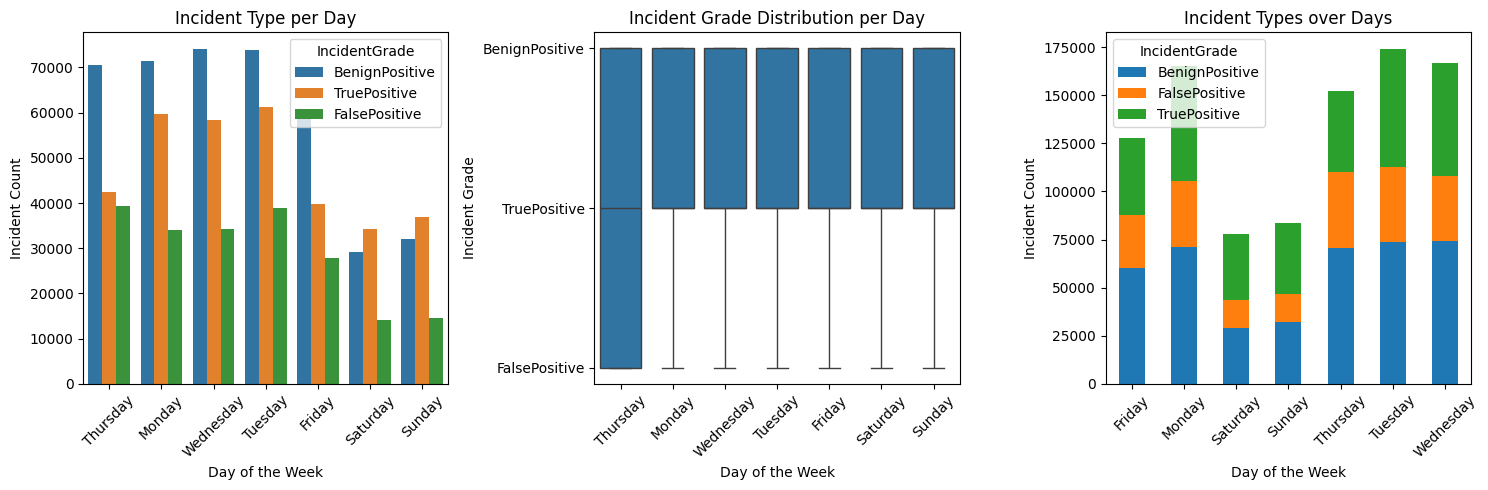

In [ ]:
# prompt: three graphs to show days vs each incident types using incidentgrade and timestamp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'train_df'
# Replace 'train_df' with your actual dataframe name if it's different

# Convert the 'Timestamp' column to datetime objects if it's not already
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])

# Extract the day of the week from the 'Timestamp' column
train_df['DayOfWeek'] = train_df['Timestamp'].dt.day_name()


# Create the three graphs

plt.figure(figsize=(15, 5))  # Adjust figure size as needed

# Graph 1: Count of each incident type per day of the week
plt.subplot(1, 3, 1)
sns.countplot(x='DayOfWeek', hue='IncidentGrade', data=train_df)
plt.title('Incident Type per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)


# Graph 2: Incident Grade distribution per day of the week
plt.subplot(1, 3, 2)
sns.boxplot(x='DayOfWeek', y='IncidentGrade', data=train_df)
plt.title('Incident Grade Distribution per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Incident Grade')
plt.xticks(rotation=45)


# Graph 3:  Relationship between Incident Type and Day
plt.subplot(1, 3, 3)
incident_day_counts = train_df.groupby(['DayOfWeek', 'IncidentGrade']).size().unstack(fill_value=0)
incident_day_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Incident Types over Days')
plt.xlabel('Day of the Week')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
# prompt: use csv and plot graph for countrycode and incident for each incident grade

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual filename
try:
    df = pd.read_csv('/content/MicrosoftSecurity.csv')
except FileNotFoundError:
    print("Error: 'your_data.csv' not found. Please provide the correct filename.")
    exit()

# Check if required columns exist
if not all(col in df.columns for col in ['COUNTRYCODE', 'INCIDENTGRADE']):
    print("Error: 'CountryCode', 'IncidentGrade', columns not found in the data.")
    exit()
df.head()
# Group data by country code and incident grade
# Create the plot


,INCIDENTGRADE,COUNTRYCODE,INCIDENT_COUNT
0,BenignPositive,242,4092452
1,TruePositive,242,2706724
2,FalsePositive,242,1916396
3,TruePositive,0,121870
4,TruePositive,1,102809


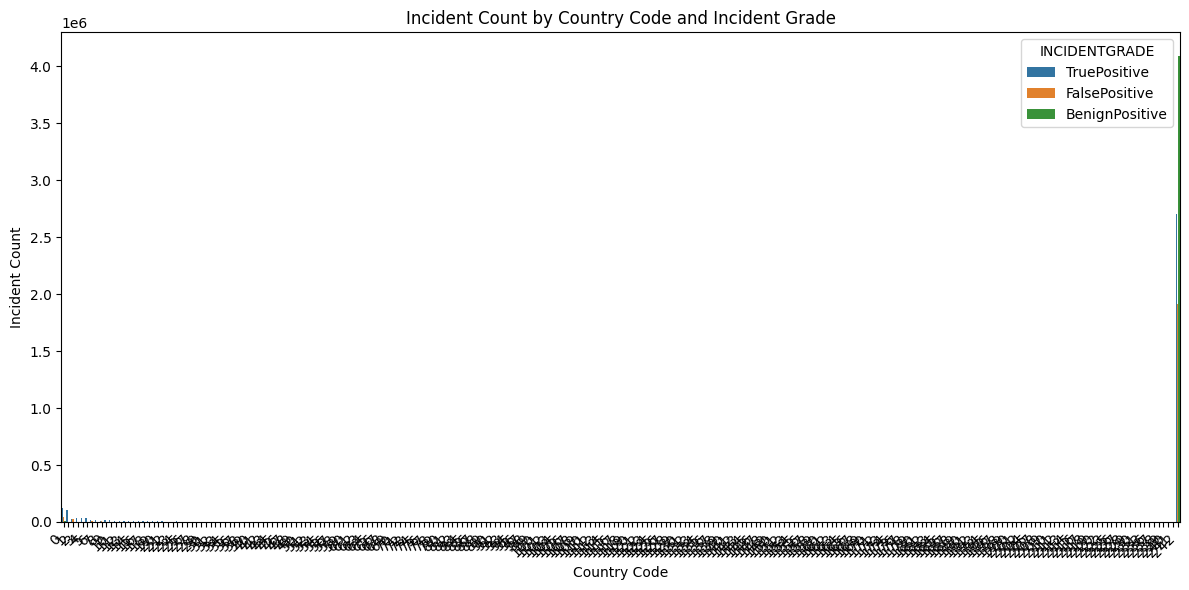

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='COUNTRYCODE', y='INCIDENT_COUNT', hue='INCIDENTGRADE', data=df)
plt.title('Incident Count by Country Code and Incident Grade')
plt.xlabel('Country Code')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Basic Models - can run

In [ ]:
from scipy.sparse import hstack, csr_matrix

In [ ]:
def process_data():

    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(train_df[features])

    train_data_ohe = ohe.transform(train_df[features])
    test_data_ohe = ohe.transform(test_df[features])

    # train_data_numerical = csr_matrix(train_data[numerical_columns].fillna(-1).values)
    # test_data_numerical = csr_matrix(test_data[numerical_columns].fillna(-1).values)

    X_train = hstack([train_data_ohe])
    X_test = hstack([test_data_ohe])

    le = LabelEncoder()
    le.fit(train_df['IncidentGrade'])

    y_train = le.transform(train_df['IncidentGrade'])
    y_test = le.transform(test_df['IncidentGrade'])

    return X_train, y_train, X_test, y_test

In [ ]:
def train_model(X_train, y_train,model):
    model.fit(X_train, y_train)

    return model

def predict(model, X_test):
    y_pred = model.predict(X_test)

    return y_pred


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
features

['DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueData',
 'ApplicationName',
 'AccountUpn',
 'OSVersion',
 'Timestamp',
 'Category',
 'MitreTechniques',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'EmailClusterId',
 'ThreatFamily',
 'ResourceType',
 'Roles',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")



X_train, y_train, X_test, y_test = process_data()



In [ ]:
# Example using RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the model
rf_model = train_model(X_train, y_train, rf_model) # Train the model
rf_predictions = predict(rf_model, X_test) # Make predictions
evaluate_model(y_test, rf_predictions) # Evaluate the model
print(f"Class",rf_model.classes_)

# Example using AdaBoostClassifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model = train_model(X_train, y_train, ab_model)
ab_predictions = predict(ab_model, X_test)
evaluate_model(y_test, ab_predictions)

# Example using GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model = train_model(X_train, y_train, gb_model)
gb_predictions = predict(gb_model, X_test)
evaluate_model(y_test, gb_predictions)
